# <font color="#d35400" color face="Giorgia">**Explanatory Data Analysis Challenge (Olympic Games)**</font>

## <font color='green' color face = "Giorgia">**Data Import and Inspection**</font>

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

# pd.options.display.float_format = '{:.3f}'.format
plt.style.use('ggplot')

In [2]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [3]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
summer[summer.isna().any(axis=1)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [6]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [7]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [8]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [9]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [10]:
dic[dic.isna().any(axis=1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


## <font color='green' color face = "Giorgia">**Merging and Concatenating**</font>

### 1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
### 2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.


In [11]:
pd.concat([summer, winter], keys = ["Summer", "Winter"], names =["Edition"]).reset_index().drop(columns = "level_1")

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [12]:
olympics = pd.concat([summer, winter], keys = ["Summer", "Winter"], names =["Edition"]).reset_index().drop(columns = "level_1")

In [13]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


### 3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [14]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


Merge to left(olympics) dataset means that we merge based on the 'Country' column  from olympics dataset. 
Watch out 'Country' column in dictionary dataset  has much more countries than 'Country' column in olympics dataset. In order not to bring 'Country' rows in dictionary dataset that are not in 'Country' column in olympics dataset we need to use Left Join(with Intersection).

In [15]:
olympics.merge(dic.iloc[:, 0:2], how = 'left', left_on='Country', right_on='Code', 
               suffixes=('_olymp', '_dic')).drop(columns='Code')

,Edition,Year,City,Sport,Discipline,Athlete,Country_olymp,Gender,Event,Medal,Country_dic
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [16]:
olympics = olympics.merge(dic.iloc[:, 0:2], how = 'left', left_on='Country', right_on='Code', 
               suffixes=('_olymp', '_dic')).drop(columns='Code')

In [17]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country_olymp,Gender,Event,Medal,Country_dic
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [18]:
olympics.rename(columns={'Country_olymp': 'Code', 'Country_dic': 'Country'}, inplace = True)

In [19]:
olympics.head(2)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria


## <font color='green' color face = "Giorgia">**Data Cleaning**</font>

### 1. Remove Spaces from column headers in dictionary.

In [20]:
dic.head(2)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [21]:
dic.rename(columns={"GDP per Capita": "GDP"}, inplace=True)

In [22]:
dic.head(2)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


### 2. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values in Country column! 

Use below iether Approach One or Approach Two. When excuting the code activate either one or the other approach.

#### Approach One: using `fillna(map())`. **If you want to use Approach One you must comment Approach Two. Status: Active**

In [23]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [24]:
olympics.loc[olympics['Country'].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [25]:
missing_country_index = olympics.loc[olympics['Country'].isna()].index
missing_country_index

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [26]:
missing_code = olympics.loc[olympics['Country'].isna()]['Code'].value_counts().index
missing_code

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [27]:
mapper = pd.Series(index=missing_code, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [28]:
mapper

Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [29]:
olympics.loc[missing_country_index, 'Code']

132      ZZX
133      ZZX
134      ZZX
135      ZZX
136      ZZX
        ... 
33961    EUN
33977    TCH
33978    TCH
33979    TCH
33980    TCH
Name: Code, Length: 6367, dtype: object

In [30]:
olympics.loc[missing_country_index, 'Code'].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [31]:
olympics["Code"].map(mapper).value_counts()

Code
Soviet Union                        2489
East Germany                         987
Romania                              642
West Germany                         584
Czechoslovakia                       487
Yugoslavia                           442
Unified Team                         283
Unified Team of Germany              281
Mixed teams                           48
Serbia                                31
Australasia                           29
Russian Empire                        17
Montenegro                            14
Trinidad and Tobago                   10
Bohemia                                7
West Indies Federation                 5
Singapore                              4
Independent Olympic Participants       3
Name: count, dtype: int64

In [32]:
# Uncommant this to use approach one and comment approach two
olympics["Country"].fillna(olympics["Code"].map(mapper), inplace = True)

In [33]:
olympics.loc[missing_country_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [34]:
# There are still values None in the Country column becuase some values in Code column are NaN
olympics.loc[olympics["Country"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


#### Approach Two: using `apply()`. **If you want to use Approach Two you must comment Approach One. Status: Inactive**

In [35]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [36]:
olympics.loc[olympics['Country'].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


<a href="https://en.wikipedia.org/wiki/List_of_IOC_country_codes">List of IOC country codes</a>

In [37]:
missing_dict = {'URS': 'Soviet Union', 'GDR': 'East Germany', 'ROU': 'Romania', 'FRG': 'West Germany', 'TCH': 'Czechoslovakia',
                'YUG': 'Yugoslavia', 'EUN': 'Unified Team', 'EUA': 'Unified Team of Germany', 'ZZX': 'Mixed teams', 'SRB': 'Serbia',
                'ANZ': 'Australasia', 'RU1': 'Russian Empire', 'MNE': 'Montenegro', 'TTO': 'Trinidad and Tobago', 'BOH': 'Bohemia',
                'BWI': 'West Indies Federation', 'SGP': 'Singapore', 'IOP': 'Independent Olympic Participants'}

In [38]:
missing_countries_code = olympics.loc[olympics["Country"].isna(), "Code"]
missing_countries_code

29603    NaN
31072    NaN
31091    NaN
31110    NaN
Name: Code, dtype: object

In [39]:
missing_countries = missing_countries_code.apply(lambda x: missing_dict.get(x))
missing_countries

29603    None
31072    None
31091    None
31110    None
Name: Code, dtype: object

In [40]:
## Uncomment this if you want to use approach two and comment approach one
# olympics.loc[olympics["Country"].isna(), "Country"] = missing_countries

In [41]:
olympics.loc[missing_country_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [42]:
# There are still values None in the Country column becuase some values in Code column are NaN
olympics.loc[olympics["Country"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


### 3. Remove rows from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)

In [43]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [44]:
olympics[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [45]:
olympics.dropna(subset = ["Code"], inplace = True)

In [46]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [47]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


Because we deleted four above rows we need to reset the index to original RangeIndex. 

In [48]:
olympics.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       36925, 36926, 36927, 36928, 36929, 36930, 36931, 36932, 36933, 36934],
      dtype='int64', length=36931)

In [49]:
olympics.reset_index(drop=True, inplace=True)

In [50]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [51]:
olympics.index

RangeIndex(start=0, stop=36931, step=1)

### 4. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

- In order to optimize memory convert to category type.  
- Also when you want to sort categorical column you can set the order as ("Bronze" < "Silver" < "Gold").

Not only Medals you can set to category type you can also set to category Gender and Edition:

In [52]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

Here we have the order "Bronze" < "Gold" < "Silver":

In [53]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [54]:
olympics["Medal"].sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: object

In order to sort categorical data in different order we have to set it to caterogy type and set the desired order.

In [55]:
olympics["Medal"] = pd.Categorical(olympics['Medal'], categories=["Bronze", "Silver", "Gold"], ordered=True)

## Alternatively:
# olympics.Medal.astype("category")
# olympics["Medal"] = olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True)

Now, you can see we change the order of categorical variable when sorting:

In [56]:
olympics["Medal"].sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [57]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


## <font color='green' color face = "Giorgia">**What are the 10 most successful countries of all times by total medals, edition, or type of medals?** </font> 

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

### 1. What are the Top 10 Countries by total medals?

In [58]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [59]:
olympics["Country"].value_counts().head(10)

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

In [60]:
## Alternatively
olympics.groupby(["Country"], observed=False)["Medal"].count().nlargest(10)

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Medal, dtype: int64

In [61]:
# Selecting top 10 countries
top_10 = olympics["Country"].value_counts().head(10).index
top_10

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary'],
      dtype='object', name='Country')

In [62]:
olympics_10 = olympics[olympics["Country"].isin(top_10)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


#### Approach 1 - using catplot(kind='count') - `used olympics_10`

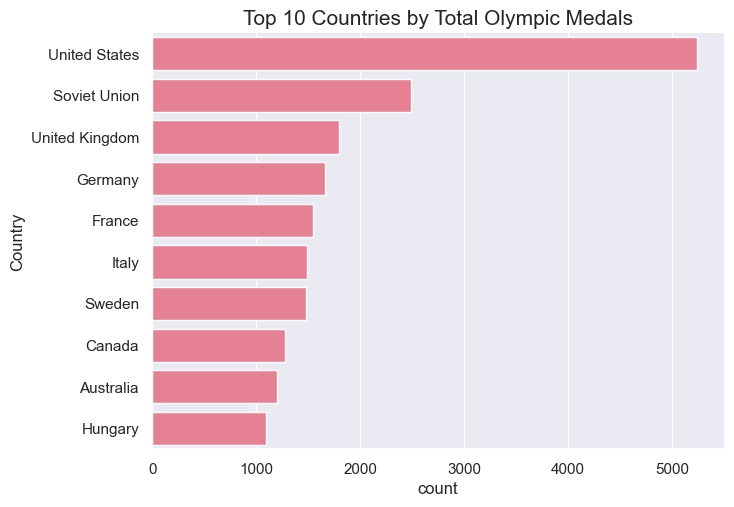

In [63]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")
sns.catplot(data=olympics_10,  kind="count", y= "Country", height=5, aspect=1.5, edgecolor=".6",
           order=top_10)
plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
plt.show()
sns.set_theme()

In [64]:
# sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")
# sns.catplot(data=olympics_10,  kind="count", x= "Country", height=5, aspect=1.5, edgecolor=".6",
#            order=top_10)
# plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
# plt.xticks(rotation=90)
# plt.show()
# sns.set_theme()

#### Approach 2 - using sns.countplot() - `used olympics_10`

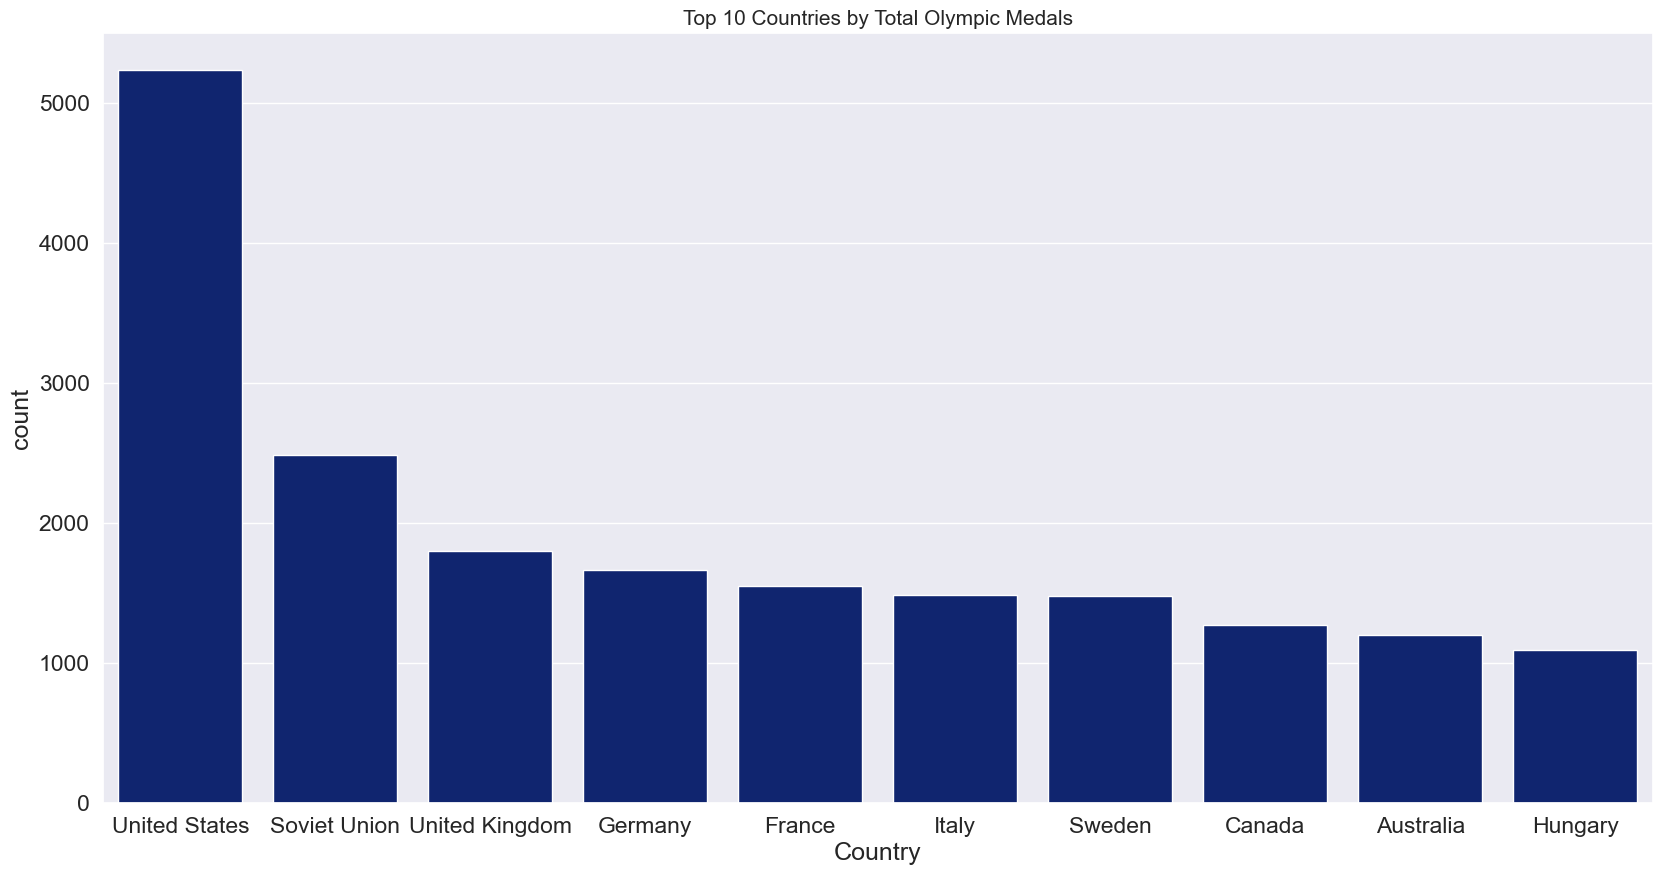

In [65]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
sns.countplot(olympics_10, x="Country", order=top_10)
plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
plt.show()
sns.set_theme()

In [66]:
# plt.figure(figsize=(20, 10))
# sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
# sns.countplot(olympics_10, y="Country", order=top_10)
# plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
# plt.show()
# sns.set_theme()

#### Approach 3 - using catplot(kind='bar') - `counted total medals by creating top_10_count`

In [67]:
top_10_count = olympics["Country"].value_counts().head(10).to_frame().reset_index()

In [68]:
top_10_count

,Country,count
0,United States,5238
1,Soviet Union,2489
2,United Kingdom,1799
3,Germany,1665
4,France,1548
5,Italy,1488
6,Sweden,1477
7,Canada,1274
8,Australia,1204
9,Hungary,1091


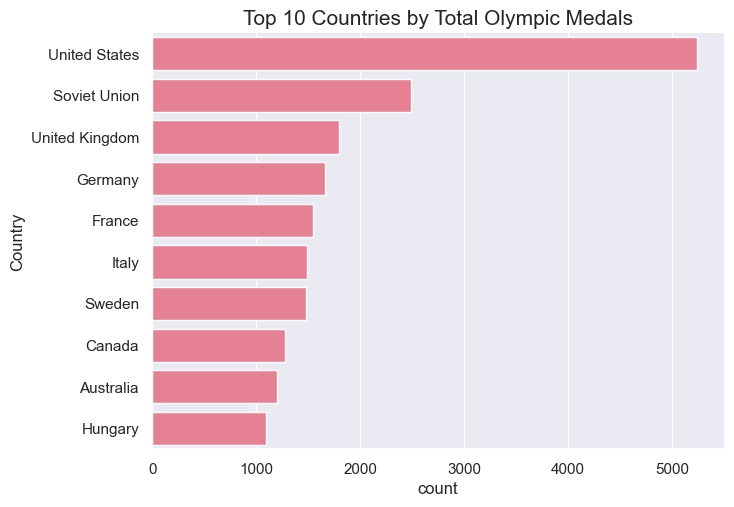

In [69]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")
sns.catplot(data=top_10_count,  kind="bar",  x="count", y= "Country",
            height=5, aspect=1.5, edgecolor=".6")
plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
plt.show()
sns.set_theme()

#### Approach 4 - using sns.barplot() - `used top_10_count`

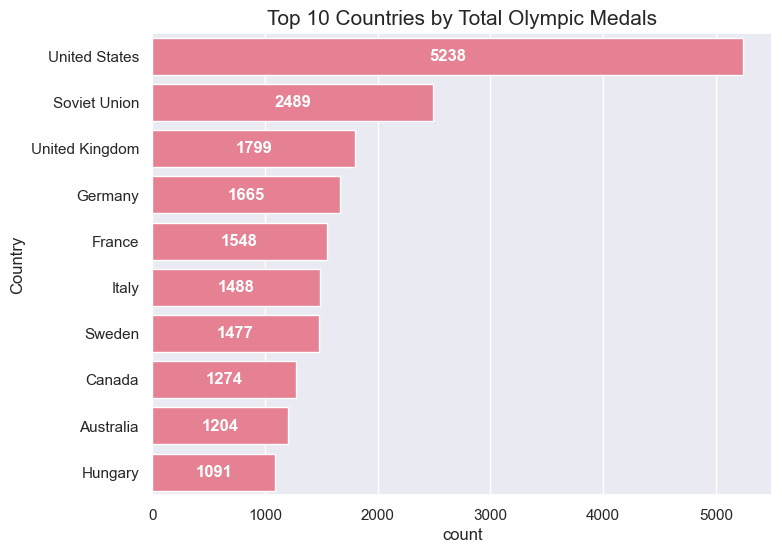

In [70]:
# Plotting the data using Seaborn
plt.figure(figsize=(8, 6))
sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")

# Bar plot for total medals
barplot = sns.barplot(x='count', y='Country', data=top_10_count)

# Adding text annotations for total medals inside the bars
for index, row in top_10_count.iterrows():
    # Placing text inside the bar and centered
    bar_width = barplot.patches[index].get_width()
    text_x_position = bar_width / 2
    plt.text(text_x_position, index, f"{row['count']}", color='white', va='center', ha='center', fontweight='bold')


plt.title('Top 10 Countries by Total Olympic Medals', fontsize=15)
plt.show()
sns.set_theme()

### 2. Split the total medals of Top 10 Countries into Summer / Winter. Are there typical Summer/Winter Games Countries?

In [71]:
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


#### Approach 1 - using catplot(kind='count') - `usig olympics_10`

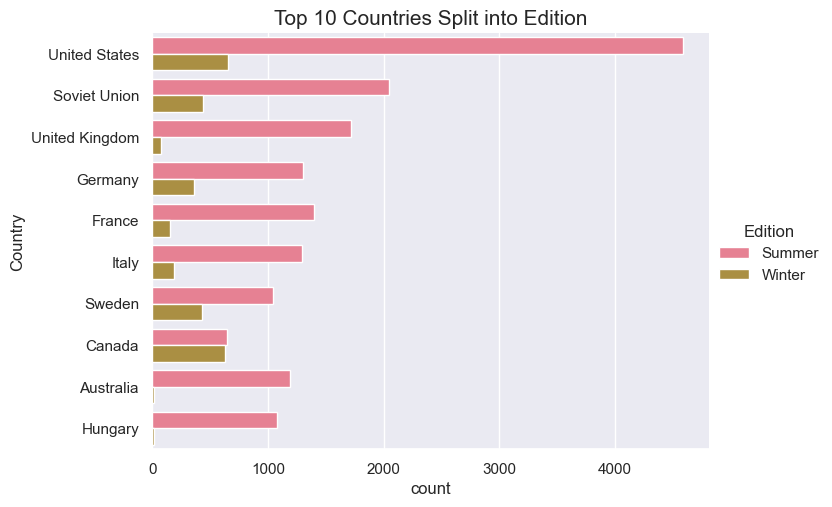

In [72]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")
sns.catplot(data=olympics_10,  kind="count", y= "Country", hue= "Edition", height=5, aspect=1.5, edgecolor=".6",
           order=top_10)
plt.title('Top 10 Countries Split into Edition', fontsize=15)
plt.show()
sns.set_theme()

In [73]:
# sns.set_theme(font_scale=1.0, font="sans-serif", palette="husl")
# sns.catplot(data=olympics_10,  kind="count", x= "Country", hue="Edition", height=5, aspect=1.5, edgecolor=".6",
#            order=top_10)
# plt.title('Top 10 Countries Split into Edition', fontsize=15)
# plt.xticks(rotation=90)
# plt.show()
# sns.set_theme()

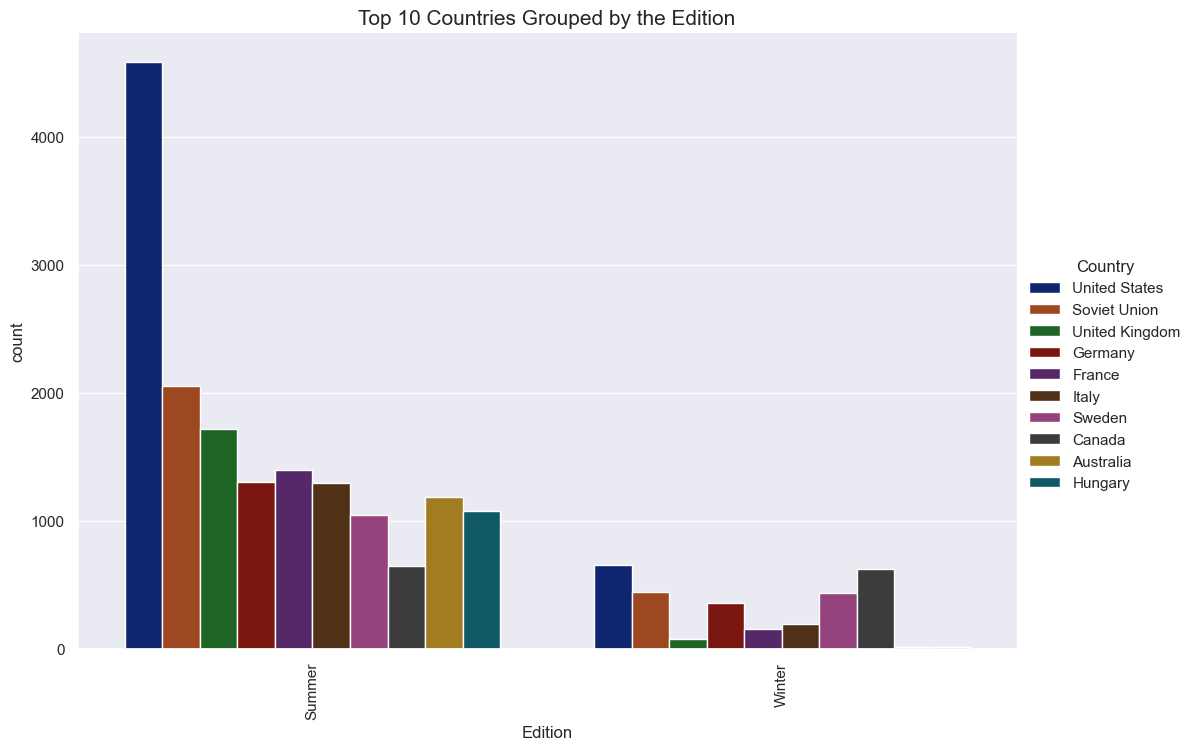

In [74]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette="dark")
sns.catplot(data=olympics_10,  kind="count", x= "Edition", hue="Country", height=7, aspect=1.5, edgecolor=".6",
           hue_order=top_10)
plt.title('Top 10 Countries Grouped by the Edition', fontsize=15)
plt.xticks(rotation=90)
plt.show()
sns.set_theme()

**Enterpritation of the results.** `Are there typical Summer/Winter Games Countries?`

After I grouped the olympic table by country and edition and counted the number of medal per group I filtered this new table by ten most common countries.
From above plot it is noticeable that all 10 countries are Summer Games countries. But typical Summer Games Countries are the USA, the UK and Germany.
The typical Winter Game countries are Canada, the USA, Soviet Union, Sweden. 

However, generally speaking, some countries are known for their strong performance in either Summer or Winter Olympics due to various factors like climate, sports culture, and investment in specific sports. For example, countries with colder climates and strong traditions in winter sports (like Sweden, Canada) often excel in the Winter Olympics, whereas countries with more diverse sports programs and larger populations (like the United States) tend to perform well in the Summer Olympics.

#### Approach 2 - using sns.countplot() - `using olympics_10`

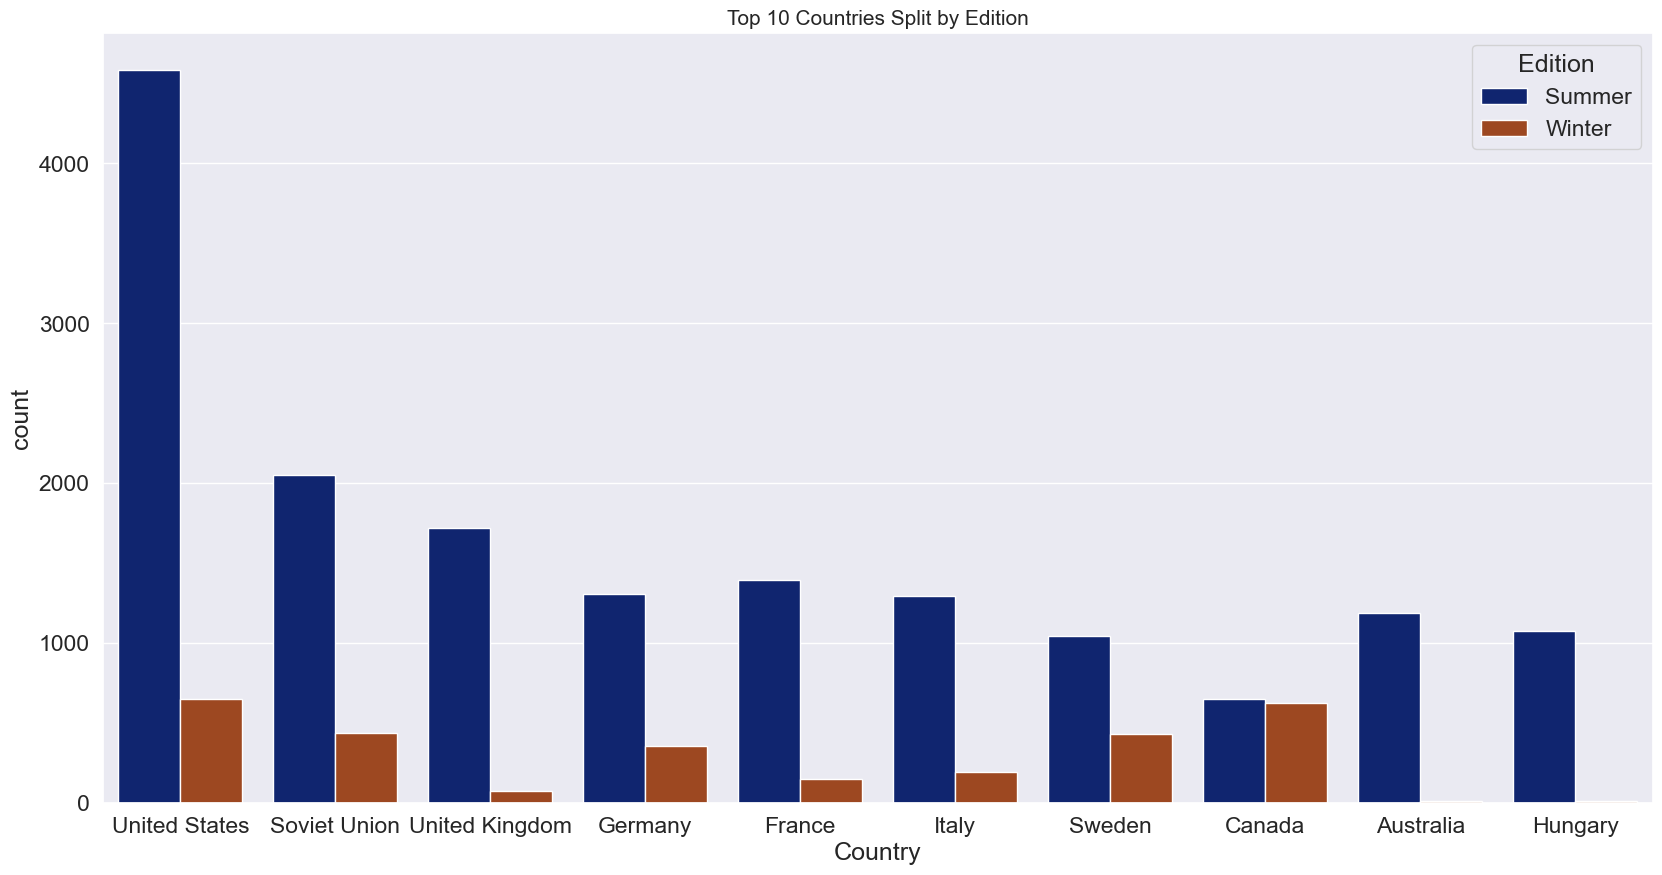

In [75]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
sns.countplot(olympics_10, x="Country", hue="Edition", order=top_10)
plt.title('Top 10 Countries Split by Edition', fontsize=15)
plt.show()
sns.set_theme()

In [76]:
# plt.figure(figsize=(20, 10))
# sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
# sns.countplot(olympics_10, y="Country", hue="Edition", order=top_10)
# plt.title('Top 10 Countries Split by Edition', fontsize=15)
# plt.show()
# sns.set_theme()

#### Approach 3 - using sns.barplot() - `splited DF into Edition by creating top_10_count_edition`

In [77]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [78]:
medals_edition = olympics.groupby(["Country", "Edition"])["Medal"].count().reset_index()
medals_edition

,Country,Edition,Medal
0,Afghanistan,Summer,2
1,Algeria,Summer,15
2,Argentina,Summer,259
3,Armenia,Summer,11
4,Australasia,Summer,29
...,...,...,...
184,West Indies Federation,Summer,5
185,Yugoslavia,Summer,435
186,Yugoslavia,Winter,7
187,Zambia,Summer,2


In [79]:
top_10

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary'],
      dtype='object', name='Country')

In [80]:
mask_top_10 = medals_edition["Country"].isin(top_10)

In [81]:
top_10_count_edition = medals_edition[mask_top_10]
top_10_count_edition

,Country,Edition,Medal
5,Australia,Summer,1189
6,Australia,Winter,15
25,Canada,Summer,649
26,Canada,Winter,625
55,France,Summer,1396
56,France,Winter,152
59,Germany,Summer,1305
60,Germany,Winter,360
68,Hungary,Summer,1079
69,Hungary,Winter,12


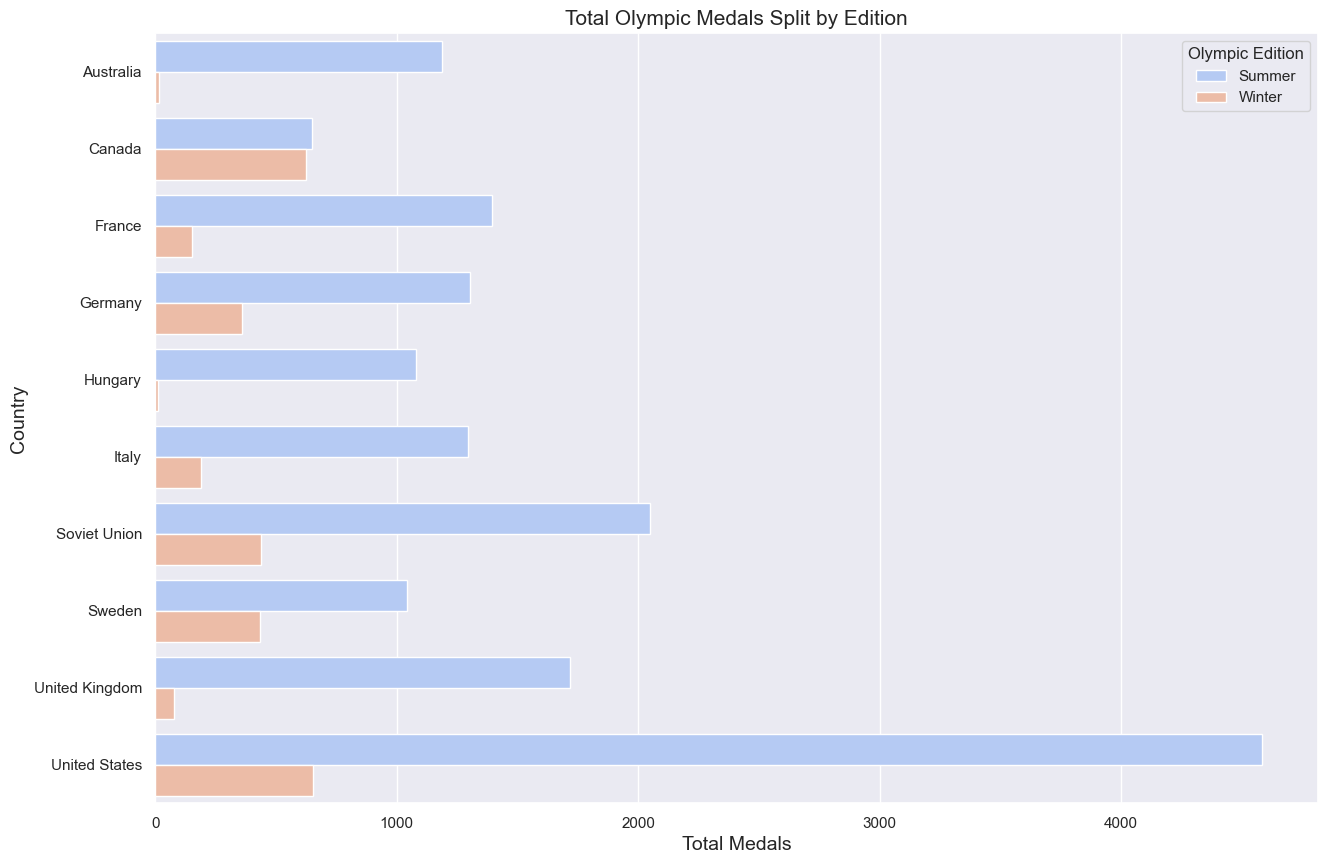

In [82]:
# Plotting the data using Seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='Medal', y='Country', hue='Edition', data=top_10_count_edition, palette='coolwarm')
plt.title('Total Olympic Medals Split by Edition', fontsize = 15)
plt.xlabel('Total Medals', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.legend(title='Olympic Edition')
plt.show()

In [83]:
# # Plotting the data using Seaborn
# plt.figure(figsize=(15, 10))
# sns.barplot(y='Medal', x='Country', hue='Edition', data=top_10_count_edition, palette='coolwarm')
# plt.title('Total Olympic Medals Split by Edition', fontsize = 15)
# plt.xlabel('Total Medals', fontsize = 14)
# plt.ylabel('Country', fontsize = 14)
# plt.legend(title='Olympic Edition')
# plt.show()

### 3. Split the total medals of Top 10 Countries into Gold, Silver, Bronze.

#### Approach 1 - using catplot(kind='count') - `used olympics_10`

In [84]:
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


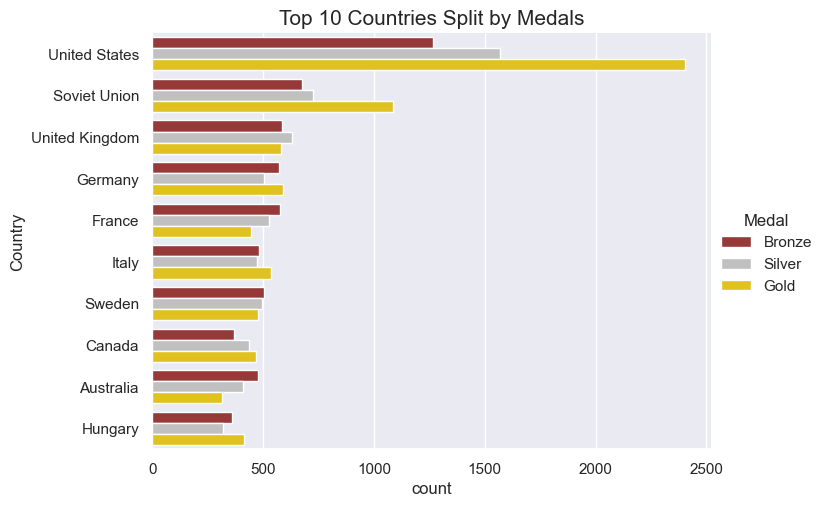

In [85]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette=[ "brown", "silver", "gold"])
sns.catplot(data=olympics_10,  kind="count", y= "Country", hue="Medal", height=5, aspect=1.5, edgecolor=".6",
           order=top_10)
plt.title('Top 10 Countries Split by Medals', fontsize=15)
plt.show()
sns.set_theme()

In [86]:
# sns.set_theme(font_scale=1.0, font="sans-serif", palette=[ "brown", "silver", "gold"])
# sns.catplot(data=olympics_10,  kind="count", x= "Country", hue="Medal", height=5, aspect=1.5, edgecolor=".6",
#            order=top_10)
# plt.title('Top 10 Countries Split by Medals', fontsize=15)
# plt.xticks(rotation=90)
# plt.show()
# sns.set_theme()

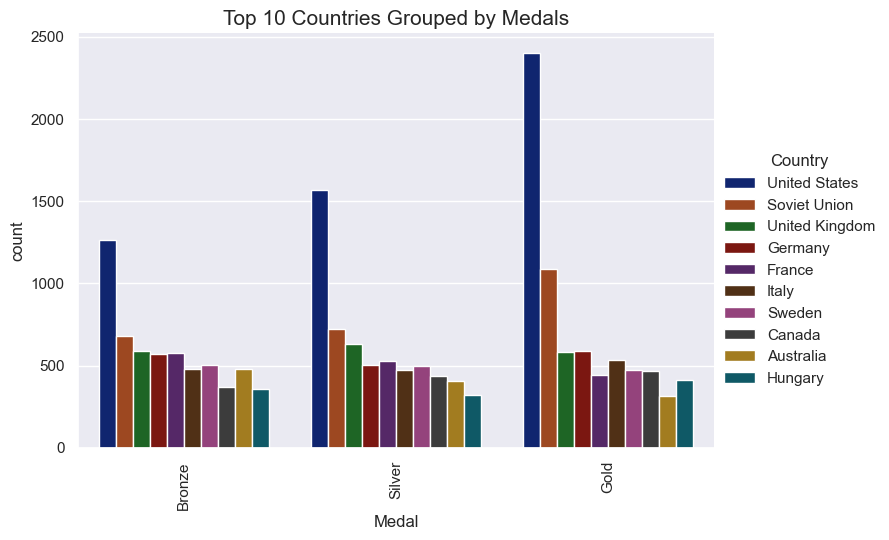

In [87]:
sns.set_theme(font_scale=1.0, font="sans-serif", palette="dark")
sns.catplot(data=olympics_10,  kind="count", x= "Medal", hue="Country", height=5, aspect=1.5, edgecolor=".6",
           hue_order=top_10)
plt.title('Top 10 Countries Grouped by Medals', fontsize=15)
plt.xticks(rotation=90)
plt.show()
sns.set_theme()

#### Approach 2 - using sns.countplot()  - `used olympics_10`

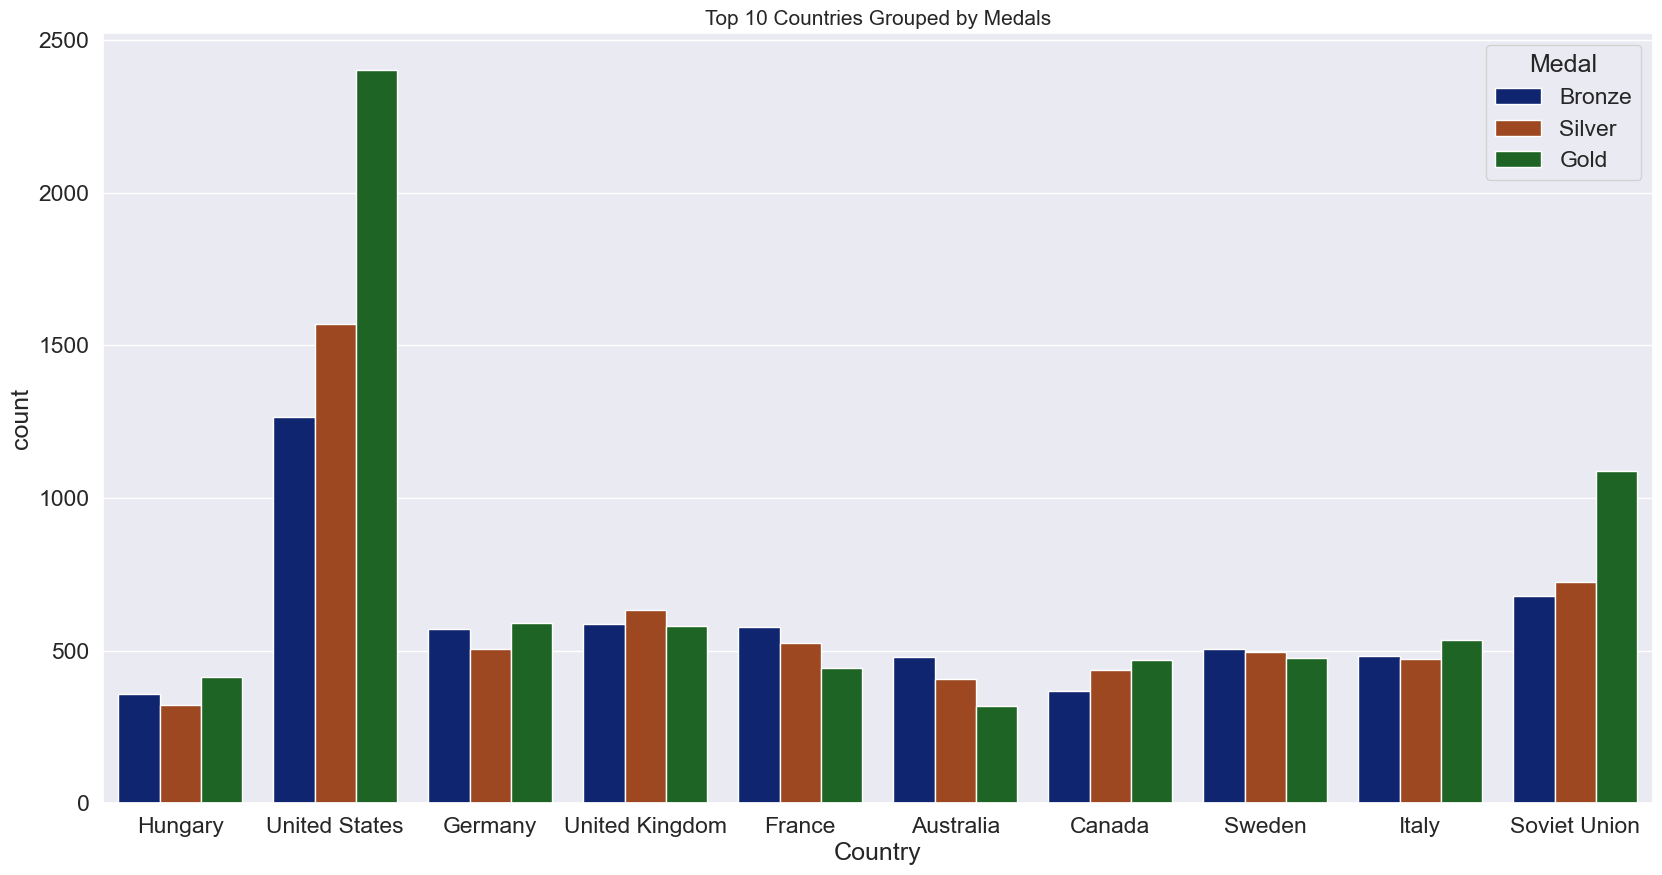

In [88]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
sns.countplot(olympics_10, x="Country", hue="Medal")
plt.title('Top 10 Countries Grouped by Medals', fontsize=15)
plt.show()
sns.set_theme()

In [89]:
# plt.figure(figsize=(20, 10))
# sns.set_theme(font_scale=1.5, font="sans-serif", palette="dark")
# sns.countplot(olympics_10, y="Country", hue="Medal")
# plt.title('Top 10 Countries Grouped by Medals', fontsize=15)
# plt.show()
# sns.set_theme()

#### Approach 3 sns.barplot() - `splited DF into Medals by creating medal_per_country`

In [90]:
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal,
                                 margins = True, margins_name = "Total")
medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [91]:
medals_per_country.drop("Total", inplace = True)

In [92]:
medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Germany,227,191,166,584
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442


In [93]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"
                                        ]].sort_values(["Total", "Gold", "Silver", "Bronze"],
                                                       ascending = False)

In [94]:
medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [95]:
medals_per_country.head(10)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


In [96]:
## Approach 1
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, margins = True, margins_name = "Total")
medals_per_country.drop("Total", inplace = True)
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"
                                        ]].sort_values(["Total", "Gold", "Silver", "Bronze"],
                                                       ascending = False)

In [97]:
## Alternatively Approach 2
# medals_per_country = olympics.groupby(["Country", "Medal"], observed=False)["Medal"].count().unstack()
# medals_per_country["Total"] = medal_per_country.sum(axis=1)
# medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"
#                                         ]].sort_values(["Total", "Gold", "Silver", "Bronze"],
#                                                        ascending = False)

In [98]:
medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [99]:
medals_per_country.head(10)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


**Grouped Bar Plot:** This is a good choice when you want to compare the distribution of bronze, silver, and gold medals for each country. It allows for easy comparison of medal counts across countries and medal types.

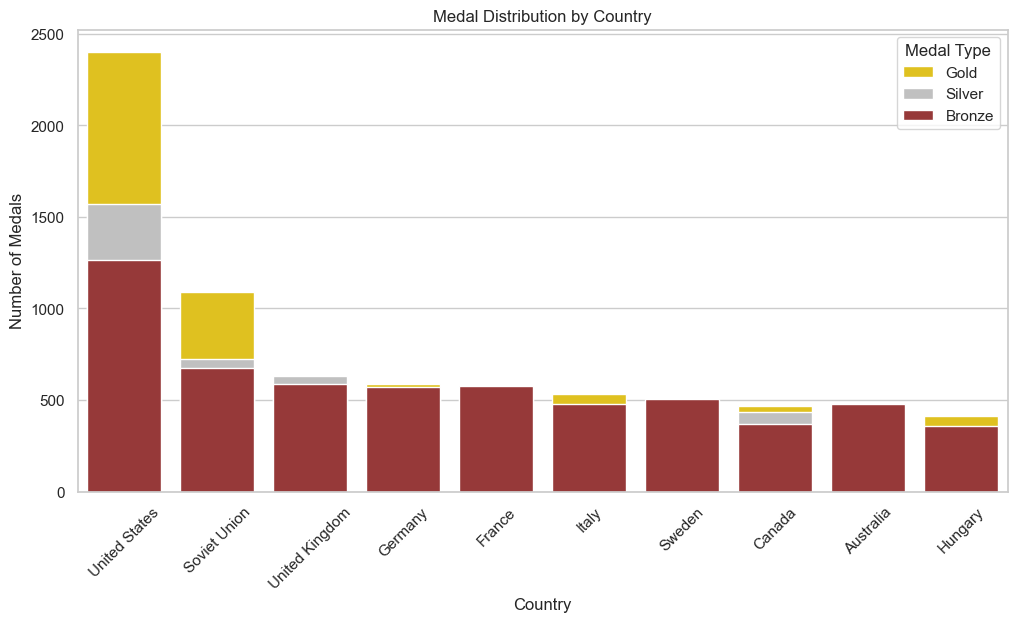

In [100]:
# Create a Seaborn barplot for medal distribution by country
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=medals_per_country, x="Country", y="Gold", color="gold", label="Gold", order=top_10)
sns.barplot(data=medals_per_country, x="Country", y="Silver", color="silver", label="Silver", order=top_10)
sns.barplot(data=medals_per_country, x="Country", y="Bronze", color="brown", label="Bronze", order=top_10)
plt.title("Medal Distribution by Country")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.legend(title="Medal Type")
plt.show()

#### Aproach 4 sns.heatmap() - `used medal_per_country`

**Heatmap:** If you want to visualize the relationship between countries and medal types, a heatmap could be effective. This can show which countries have more or fewer medals in a visually intuitive way.

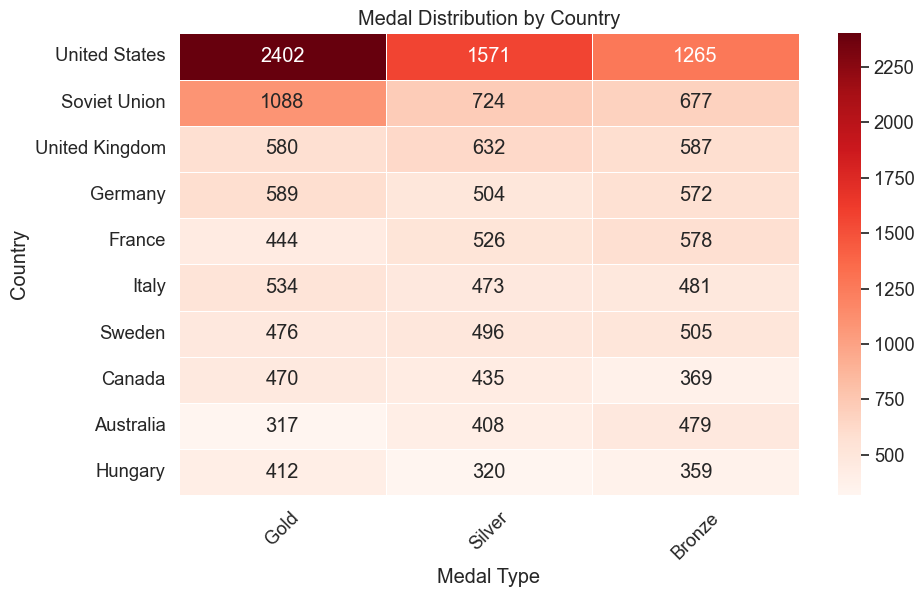

In [101]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(medals_per_country[["Gold", "Silver", "Bronze"]].head(10), cmap="Reds", annot=True, fmt='d', linewidths=0.5)
plt.title("Medal Distribution by Country")
plt.xticks(rotation=45)
plt.xlabel("Medal Type")
plt.ylabel("Country")
plt.show()

#### Approach 5 sns.scatterplot() - `used medal_per_country`

**Scatter Plot:** If you want to explore the relationships between different variables in your data, a scatter plot can be helpful. For example, you could create a scatter plot to compare the number of gold medals with the number of total medals for each country.

In [102]:
medals_per_country.head(10)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


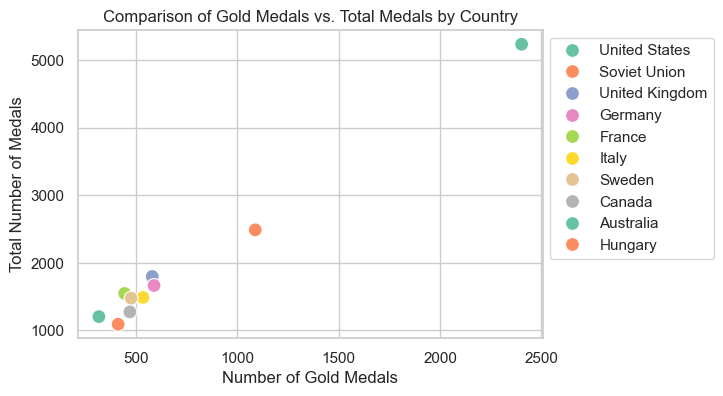

In [103]:
# Create a Seaborn scatter plot to compare gold medals with total medals
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.scatterplot(data = medals_per_country.head(10), x='Gold', y='Total', hue='Country', palette="Set2", s=100)

plt.title("Comparison of Gold Medals vs. Total Medals by Country")
plt.xlabel("Number of Gold Medals")
plt.ylabel("Total Number of Medals")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

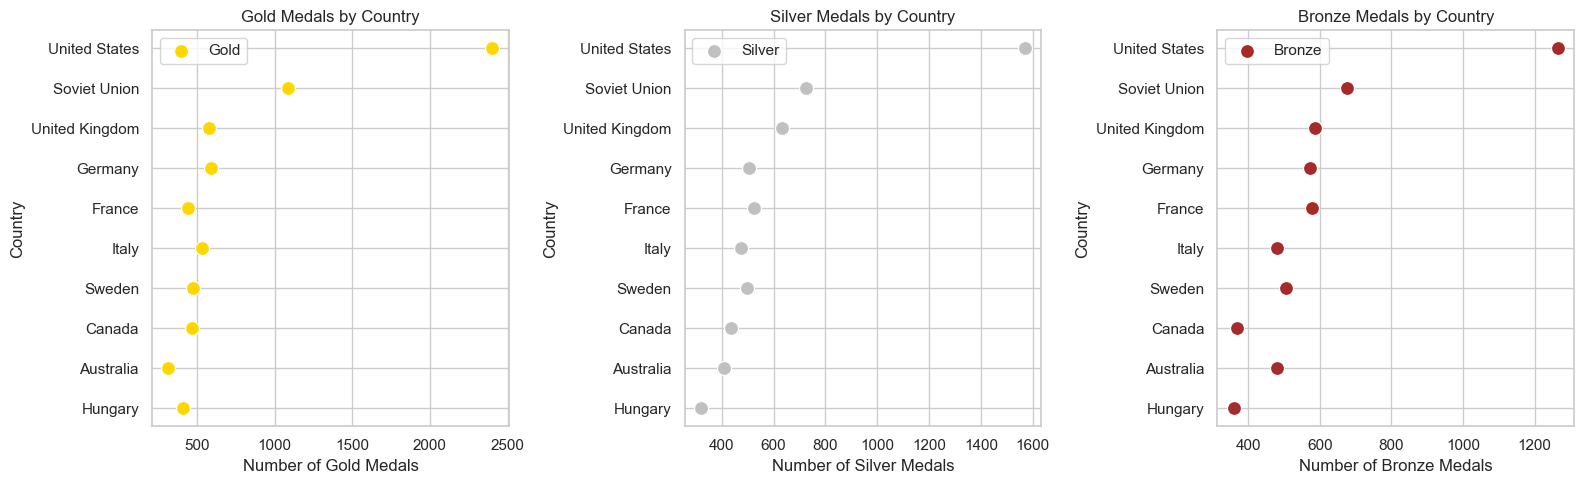

In [104]:
# Create a Seaborn relplot for scatterplots of gold, silver, and bronze medals
plt.figure(figsize=(16, 5))
sns.set(style="whitegrid")

# Gold Medals Scatterplot
plt.subplot(131)
sns.scatterplot(data=medals_per_country.head(10), x='Gold', y='Country', color='gold', s=100, label='Gold')
plt.title("Gold Medals by Country")
plt.xlabel("Number of Gold Medals")
plt.ylabel("Country")
plt.legend()

# Silver Medals Scatterplot
plt.subplot(132)
sns.scatterplot(data=medals_per_country.head(10), x='Silver', y='Country', color='silver', s=100, label='Silver')
plt.title("Silver Medals by Country")
plt.xlabel("Number of Silver Medals")
plt.ylabel("Country")
plt.legend()

# Bronze Medals Scatterplot
plt.subplot(133)
sns.scatterplot(data=medals_per_country.head(10), x='Bronze', y='Country', color='brown', s=100, label='Bronze')
plt.title("Bronze Medals by Country")
plt.xlabel("Number of Bronze Medals")
plt.ylabel("Country")
plt.legend()

plt.tight_layout()
plt.show()

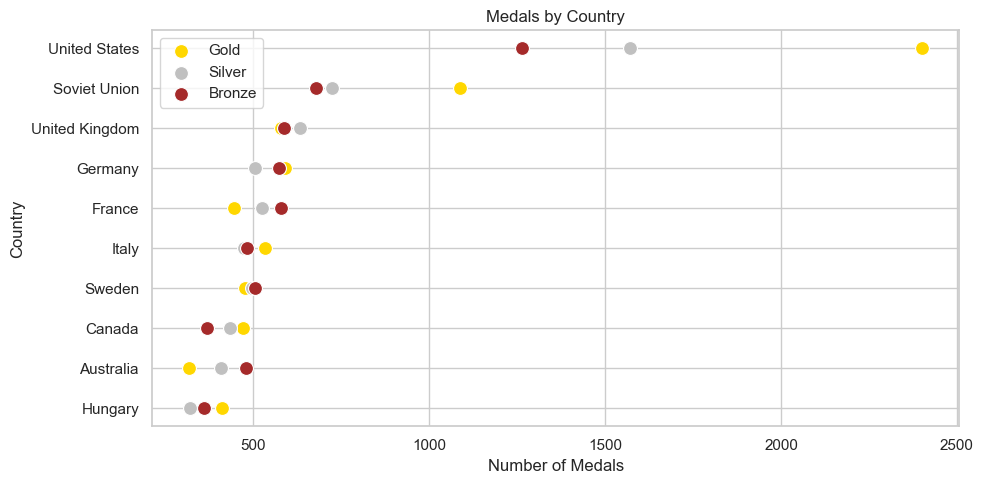

In [105]:
# Create a single figure
plt.figure(figsize=(10, 5))

# Gold Medals Scatterplot
sns.set(style="whitegrid")
sns.scatterplot(data=medals_per_country.head(10), x='Gold', y='Country', color='gold', s=100, label='Gold')

# Silver Medals Scatterplot
sns.scatterplot(data=medals_per_country.head(10), x='Silver', y='Country', color='silver', s=100, label='Silver')

# Bronze Medals Scatterplot
sns.scatterplot(data=medals_per_country.head(10), x='Bronze', y='Country', color='brown', s=100, label='Bronze')

plt.title("Medals by Country")
plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.legend()
plt.tight_layout()
plt.show()

## <font color='green' color face = "Giorgia">**Do GDP, Population and Politics matter?** </font> 

### 1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

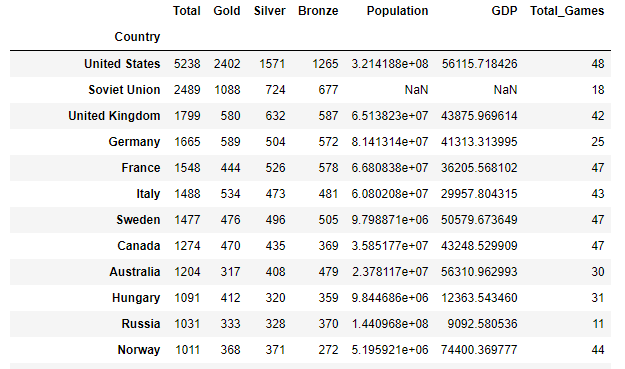

We already have medal_per_country dataset:

In [106]:
medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [107]:
dic

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [108]:
medals_pop_gdp_per_country = medals_per_country.merge(dic, how="left", left_index = True, right_on = "Country").drop(columns="Code").set_index("Country")
medals_pop_gdp_per_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Macedonia,1,0,0,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1262605.0,9252.110724


In [109]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + str(x.City), axis = 1)

In [110]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [111]:
olympics.Games.nunique()

49

In [112]:
olympics["Games"].value_counts()

Games
2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris            

Show unique games per country:

In [113]:
olympics.groupby("Country").apply(lambda x: x.Games)

Country           
Afghanistan  28965        2008 Beijing
             30928         2012 London
Algeria      17060    1984 Los Angeles
             17064    1984 Los Angeles
             19874      1992 Barcelona
                            ...       
Zimbabwe     25267         2004 Athens
             27216        2008 Beijing
             27243        2008 Beijing
             27268        2008 Beijing
             27280        2008 Beijing
Name: Games, Length: 36931, dtype: object

Show number of unique games per country:

In [114]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [115]:
medals_pop_gdp_per_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Macedonia,1,0,0,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1262605.0,9252.110724


In [116]:
medals_pop_gdp_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [125]:
pd.options.display.float_format = '{:.0f}'.format
medals_pop_gdp_per_country.head(12)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820,56116,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232,43876,42
Germany,1665,589,504,572,81413145,41313,25
France,1548,444,526,578,66808385,36206,47
Italy,1488,534,473,481,60802085,29958,43
Sweden,1477,476,496,505,9798871,50580,47
Canada,1274,470,435,369,35851774,43249,47
Australia,1204,317,408,479,23781169,56311,30


Compare to correct table:

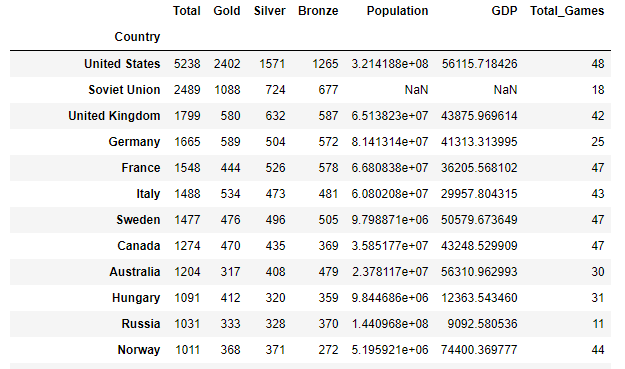

### 2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

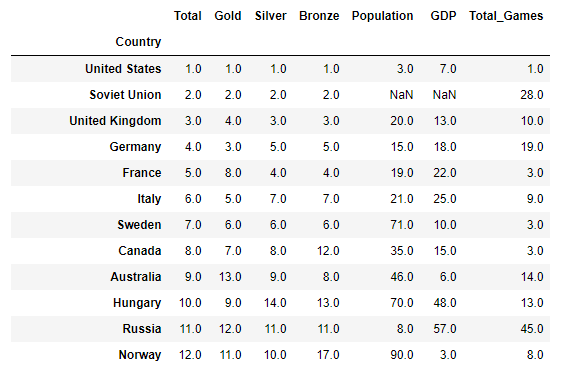

In [127]:
medals_pop_gdp_per_country_rank = medals_pop_gdp_per_country.rank(ascending = False)
medals_pop_gdp_per_country_rank.head(12)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1,1,1,1,3,7,1
Soviet Union,2,2,2,2,NaN,NaN,28
United Kingdom,3,4,3,3,20,13,10
Germany,4,3,5,5,15,18,19
France,5,8,4,4,19,22,3
Italy,6,5,7,7,21,25,9
Sweden,7,6,6,6,71,10,3
Canada,8,7,8,12,35,15,3
Australia,9,13,9,8,46,6,14


## <font color='green' color face = "Giorgia">**Statistical Analysis and Hypothesis Testing with scipy** </font> 

In the following work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation). In this part, we are going to test whether the factors population, GDP per capita and the number of participations influence and determine a country's success in Olympic Games with statistical significance.

- So population is the metric for the size of a country.

- GDP per capita is a metric for the wealth or the standard of living, and
  
- the number of participations is an indicator for the political stability.

So in simple words, we are testing whether the relationships between size and success, wealth and

success and political stability and success are just random or statistically significant.

And essentially we will calculate correlation coefficients and test whether these coefficients are significantly different from zero. So a correlation coefficient of zero indicates no relationship.
And in case we can reject the hypothesis that the correlation coefficient is equal to zero, we can
conclude that there is a relationship.

First, we would need to check if we have any NaN values and [how to deal with NaN values during correlation](./Support_files/How_to_deal_with_NaN_values_during_correlation.ipynb). We can omit or drop NaN values. Here is where I have NaN values:

In [133]:
medals_pop_gdp_per_country_rank[medals_pop_gdp_per_country_rank[['Total', 'GDP', 'Total_Games', 'Population']].isna().any(axis=1)]

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
Soviet Union,2,2,2,2,NaN,NaN,28
East Germany,13,10,13,16,NaN,NaN,45
West Germany,21,19,24,21,NaN,NaN,40
Czechoslovakia,24,32,21,23,NaN,NaN,17
Yugoslavia,26,24,26,29,NaN,NaN,28
Cuba,30,20,31,31,61,NaN,36
Unified Team,32,26,34,35,NaN,NaN,108
Unified Team of Germany,33,33,32,32,NaN,NaN,73
Iran,50,55,49,53,16,NaN,34


In [146]:
pd.options.display.float_format = '{:.2f}'.format
df = medals_pop_gdp_per_country_rank[['Total', 'GDP', 'Total_Games', 'Population']]
# df = df.dropna() # drop all rows with na values
df.corr(method='spearman', numeric_only=True) # I omit NaN values

,Total,GDP,Total_Games,Population
Total,1.00,0.46,0.93,0.42
GDP,0.46,1.00,0.50,-0.24
Total_Games,0.93,0.50,1.00,0.40
Population,0.42,-0.24,0.40,1.00


There is a strong positive correlation between Total Games and total medals (0.93). There is also a relatively strong positive correlation between GDP and Total medal (0.46), and a relatively strong positive correlation (0.42) between Population and Total medals. But we also need to test hypothesis if the results are statistically significant. For that we are going to use Scipy package to manually get p_values.

To check whether GDP (Standard of Living), Total_Games (Political Stability measure), and Population (Size) have an effect on Total Medals using Spearman correlation and perform hypothesis testing, you can use Python with the scipy library. Here's a step-by-step guide to performing this analysis:

In [147]:
from scipy.stats import spearmanr

# Step 1: Find out if there is a correlation

# Extract the relevant columns for analysis
df = medals_pop_gdp_per_country_rank[['Total', 'GDP', 'Total_Games', 'Population']]

# Drop rows with NaN values in any column
# df = df.dropna()

# Create a dictionary to store correlations and p-values
correlations = {}
# Calculate and print the Spearman correlation coefficients
for column in df.columns[1:]:
    correlation, p_value = spearmanr(df['Total'], df[column], nan_policy = "omit")
    correlations[column] = (correlation, p_value)
    print(f"Spearman correlation between Total Medals and {column}: {correlation:.2f}",'\n')

# Step 2: Perform hypothesis testing to determine if the correlations are statistically significant.
# Define the significance level (alpha)
alpha = 0.05
for column, (correlation, p_value) in correlations.items():
    if p_value < alpha:
        print(f"Spearman correlation between Total Medals and {column} is statistically significant (p-value: {p_value:.4f})")
    else:
        print(f"Spearman correlation between Total Medals and {column} is not statistically significant (p-value: {p_value:.4f})")


Spearman correlation between Total Medals and GDP: 0.46 

Spearman correlation between Total Medals and Total_Games: 0.93 

Spearman correlation between Total Medals and Population: 0.42 

Spearman correlation between Total Medals and GDP is statistically significant (p-value: 0.0000)
Spearman correlation between Total Medals and Total_Games is statistically significant (p-value: 0.0000)
Spearman correlation between Total Medals and Population is statistically significant (p-value: 0.0000)


Based on the output you provided, here are the results of the Spearman correlation analysis and hypothesis testing:

1. Spearman correlation between Total Medals and GDP: 0.46
   - Hypothesis 1: There is no relationship between Total Medals and GDP per Capita
   - The Spearman correlation coefficient between Total Medals and GDP is 0.46, indicating a strong positive correlation.
   - The p-value for this correlation is very close to zero (p-value: 0.0000), which means that the correlation is statistically significant. Therefore, there is a statistically significant positive relationship between the total number of medals and GDP (standard of living).
   - Reject Hypothesis 1: There is a significant (positive) relationship between Total Medals and GDP per Capita

2. Spearman correlation between Total Medals and Total Games: 0.93
   - Hypothesis 2: There is no relationship between Total Medals and Total Games
   - The Spearman correlation coefficient between Total Medals and Total Games is 0.93, indicating a very strong positive correlation.
   - The p-value for this correlation is very close to zero (p-value: 0.0000), which means that the correlation is statistically significant. Therefore, there is a statistically significant positive relationship between the total number of medals and the number of total games (a measure of political stability).
   - Reject Hypothesis 2: There is a significant (positive) relationship between Total Medals and Total Games

3. Spearman correlation between Total Medals and Population: 0.42
   - Hypothesis 3: There is no relationship between Total Medals and Population
   - The Spearman correlation coefficient between Total Medals and Population is 0.44, indicating a strong positive correlation.
   - The p-value for this correlation is very close to zero (p-value: 0.0000), which means that the correlation is statistically significant. Therefore, there is a statistically significant positive relationship between the total number of medals and the Population (size).
   - Reject Hypothesis 1: There is a significant (positive) relationship between Total Medals and Population

In summary, the analysis indicates that there is a strong positive correlation between the total number of medals and all three variables GDP (standard of living), the number of total games (a measure of political stability) and the Population (size). 

So my conclusion is that wealth, political stability, and size of the country do matter, and they positively influence and determine a country's success in Olympic Games. 

[What is the difference between Spearman Correlation and Pearson Correlation?](./Support_files/What_is_the_difference_between_Spearman_Correlation_and_Pearson_Correlation.ipynb)

[What is Non-parametric statistical test?](./Support_files/What_is_Non-parametric_statistical_test.ipynb)

## <font color='green' color face = "Giorgia">**Medals Heatmap by Gender and Edition** </font> 

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

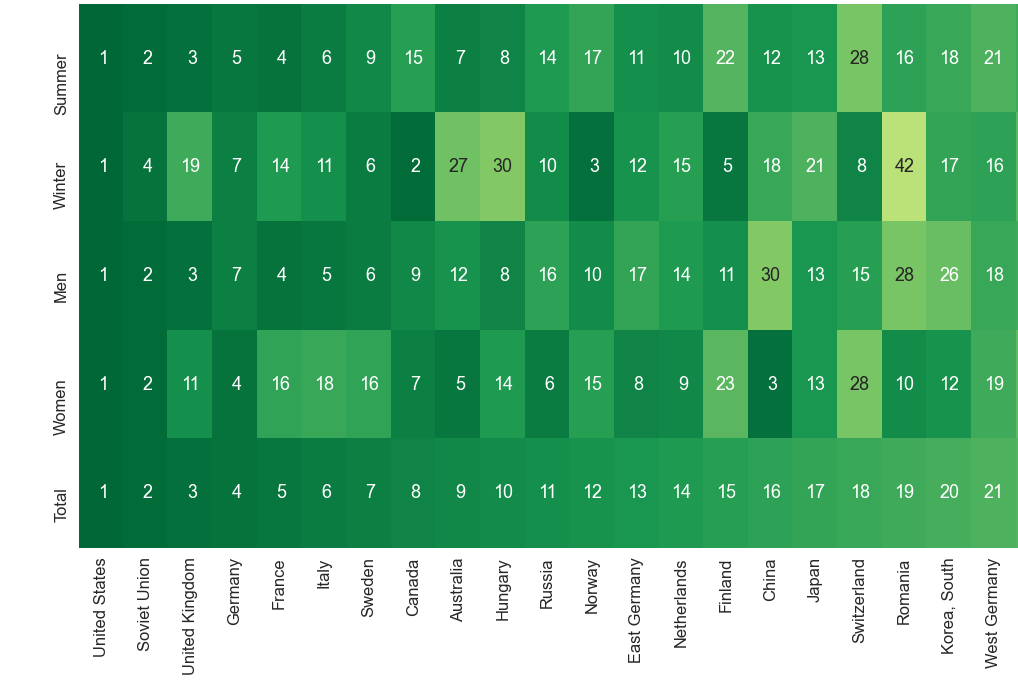

### Data preparation

In [148]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [169]:
sum_vs_win = pd.crosstab(columns = olympics.Edition, index = olympics.Country)
sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [170]:
men_vs_women = pd.crosstab(columns = olympics.Gender, index = olympics.Country)
men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [174]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis=1)
medals_by_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [175]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter

In [177]:
medals_by_cats.sort_values("Total", ascending = False, inplace = True)

In [178]:
medals_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [179]:
ranks = medals_by_cats.rank(ascending = False)
ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.00,1.00,1.00,1.00,1.00
Soviet Union,2.00,4.00,2.00,2.00,2.00
United Kingdom,3.00,19.00,3.00,11.00,3.00
Germany,5.00,7.00,7.00,4.00,4.00
France,4.00,14.00,4.00,16.50,5.00
...,...,...,...,...,...
Iraq,132.50,95.50,127.00,120.00,133.50
Senegal,132.50,95.50,127.00,120.00,133.50
Macedonia,132.50,95.50,127.00,120.00,133.50


In [180]:
top_50_rank = ranks.head(50)
top_50_rank

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.00,1.00,1.00,1.00,1.00
Soviet Union,2.00,4.00,2.00,2.00,2.00
United Kingdom,3.00,19.00,3.00,11.00,3.00
Germany,5.00,7.00,7.00,4.00,4.00
France,4.00,14.00,4.00,16.50,5.00
Italy,6.00,11.00,5.00,18.00,6.00
Sweden,9.00,6.00,6.00,16.50,7.00
Canada,15.00,2.00,9.00,7.00,8.00
Australia,7.00,27.00,12.00,5.00,9.00


### Medals Heatmap by Gender and Edition

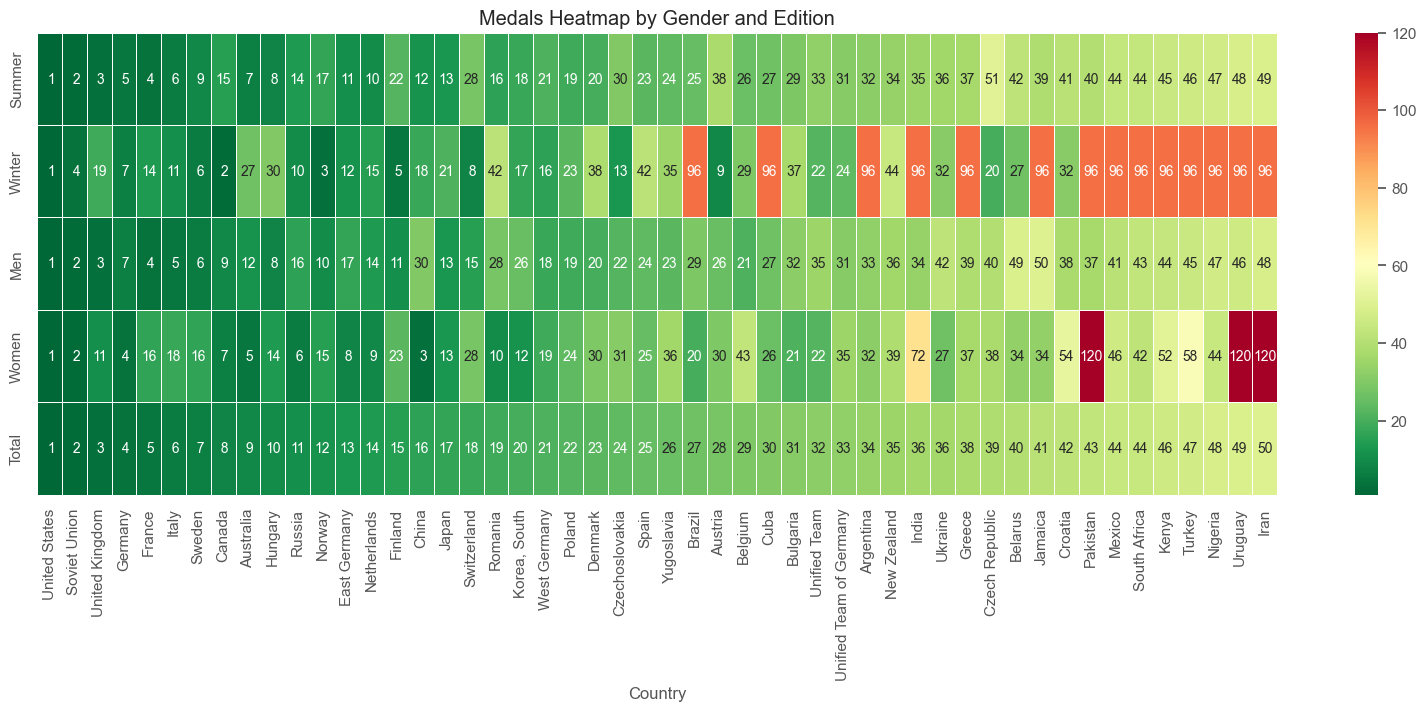

In [184]:
#Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette('RdYlGn_r', as_cmap=True)
# cmap = cmap.reversed()

heatmap = sns.heatmap(top_50_rank.T, cmap=cmap, annot=True, linewidths=0.5, fmt='2.0f')

plt.xticks(rotation=90)
plt.title('Medals Heatmap by Gender and Edition')
plt.xlabel('Country')
plt.show()

##  <font color='green' color face = "Giorgia">**Summer Games vs. Winter Games - does Geographical Location matter?** </font> 

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

### First, let's compare summer athletes to winter athletes in the same country, who got more medals. Identify countries where athletes got more medals in the Winter Games than in the Summer Games and vise verse.  

In [187]:
equally_succesful_countries = top_50_rank[top_50_rank["Summer"] == top_50_rank["Winter"]][["Summer", "Winter"]]
equally_succesful_countries

,Summer,Winter
Country,,
United States,1.00,1.00


In [188]:
summer_more_successful_than_winter_in_the_same_country = top_50_rank[top_50_rank["Summer"] < top_50_rank["Winter"]][["Summer", "Winter"]]
summer_more_successful_than_winter_in_the_same_country["diff"] = summer_more_successful_than_winter_in_the_same_country.Summer - summer_more_successful_than_winter_in_the_same_country.Winter

In [189]:
summer_more_successful_than_winter_in_the_same_country.sort_values("diff", inplace=True)

In [190]:
summer_more_successful_than_winter_in_the_same_country

,Summer,Winter,diff
Country,,,
Brazil,25.00,95.50,-70.50
Cuba,27.00,95.50,-68.50
Argentina,32.00,95.50,-63.50
India,35.00,95.50,-60.50
Greece,37.00,95.50,-58.50
Jamaica,39.00,95.50,-56.50
Pakistan,40.00,95.50,-55.50
South Africa,43.50,95.50,-52.00
Mexico,43.50,95.50,-52.00


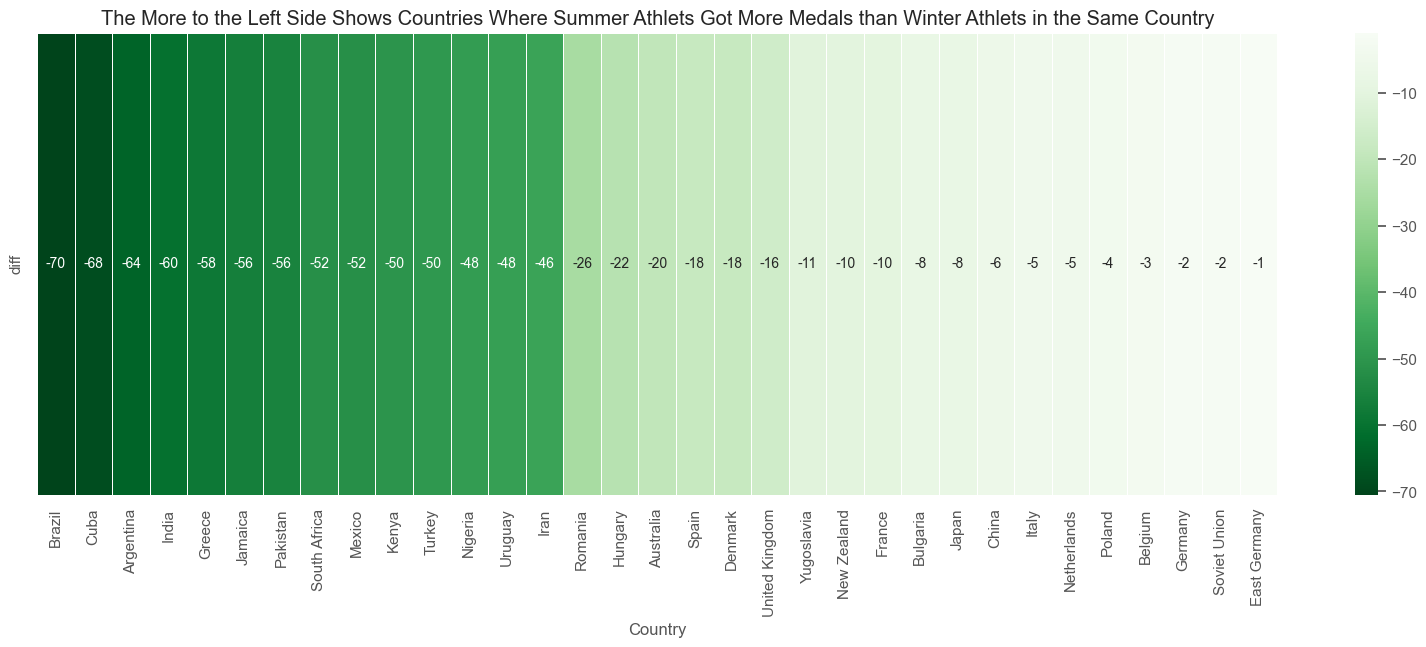

In [191]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("Greens", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(summer_more_successful_than_winter_in_the_same_country[["diff"]].T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('The More to the Left Side Shows Countries Where Summer Athlets Got More Medals than Winter Athlets in the Same Country')
plt.xlabel('Country')
plt.show()

In [192]:
winter_more_successful_than_summer_in_the_same_country = top_50_rank[top_50_rank["Summer"] > top_50_rank["Winter"]][["Summer", "Winter"]]
winter_more_successful_than_summer_in_the_same_country["diff"] = winter_more_successful_than_summer_in_the_same_country.Summer - winter_more_successful_than_summer_in_the_same_country.Winter

In [193]:
winter_more_successful_than_summer_in_the_same_country.sort_values("diff", inplace=True)

In [194]:
winter_more_successful_than_summer_in_the_same_country

,Summer,Winter,diff
Country,,,
"Korea, South",18.00,17.00,1.00
Sweden,9.00,6.00,3.00
Russia,14.00,10.00,4.00
Ukraine,36.00,31.50,4.50
West Germany,21.00,16.00,5.00
Unified Team of Germany,31.00,24.00,7.00
Croatia,41.00,31.50,9.50
Unified Team,33.00,22.00,11.00
Canada,15.00,2.00,13.00


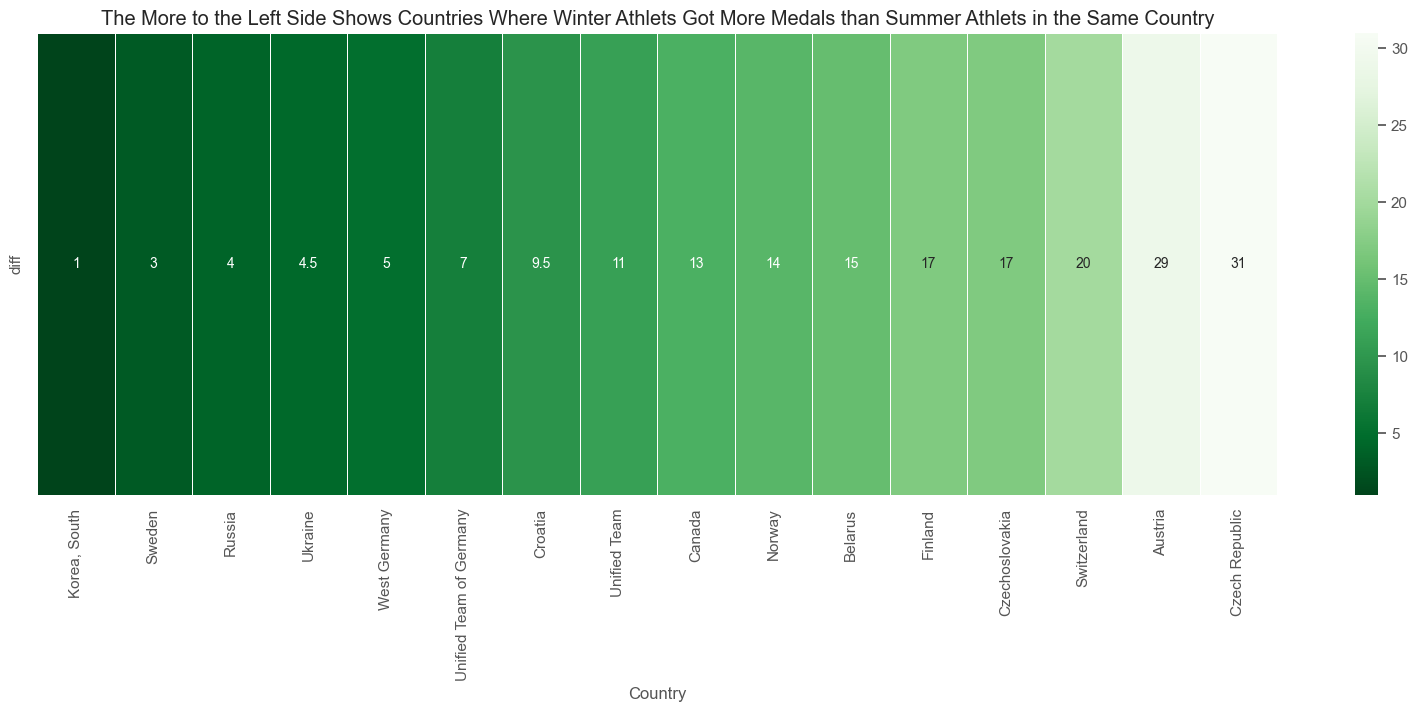

In [195]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("Greens", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(winter_more_successful_than_summer_in_the_same_country[["diff"]].T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('The More to the Left Side Shows Countries Where Winter Athlets Got More Medals than Summer Athlets in the Same Country')
plt.xlabel('Country')
plt.show()

In [196]:
rank_diff = top_50_rank.Summer.sub(top_50_rank.Winter).sort_values().to_frame()
rank_diff

,0
Country,
Brazil,-70.50
Cuba,-68.50
Argentina,-63.50
India,-60.50
Greece,-58.50
Jamaica,-56.50
Pakistan,-55.50
South Africa,-52.00
Mexico,-52.00


The smaller the number the more athletes won medals in Summer games compare to winter games in the same country and vise verse.

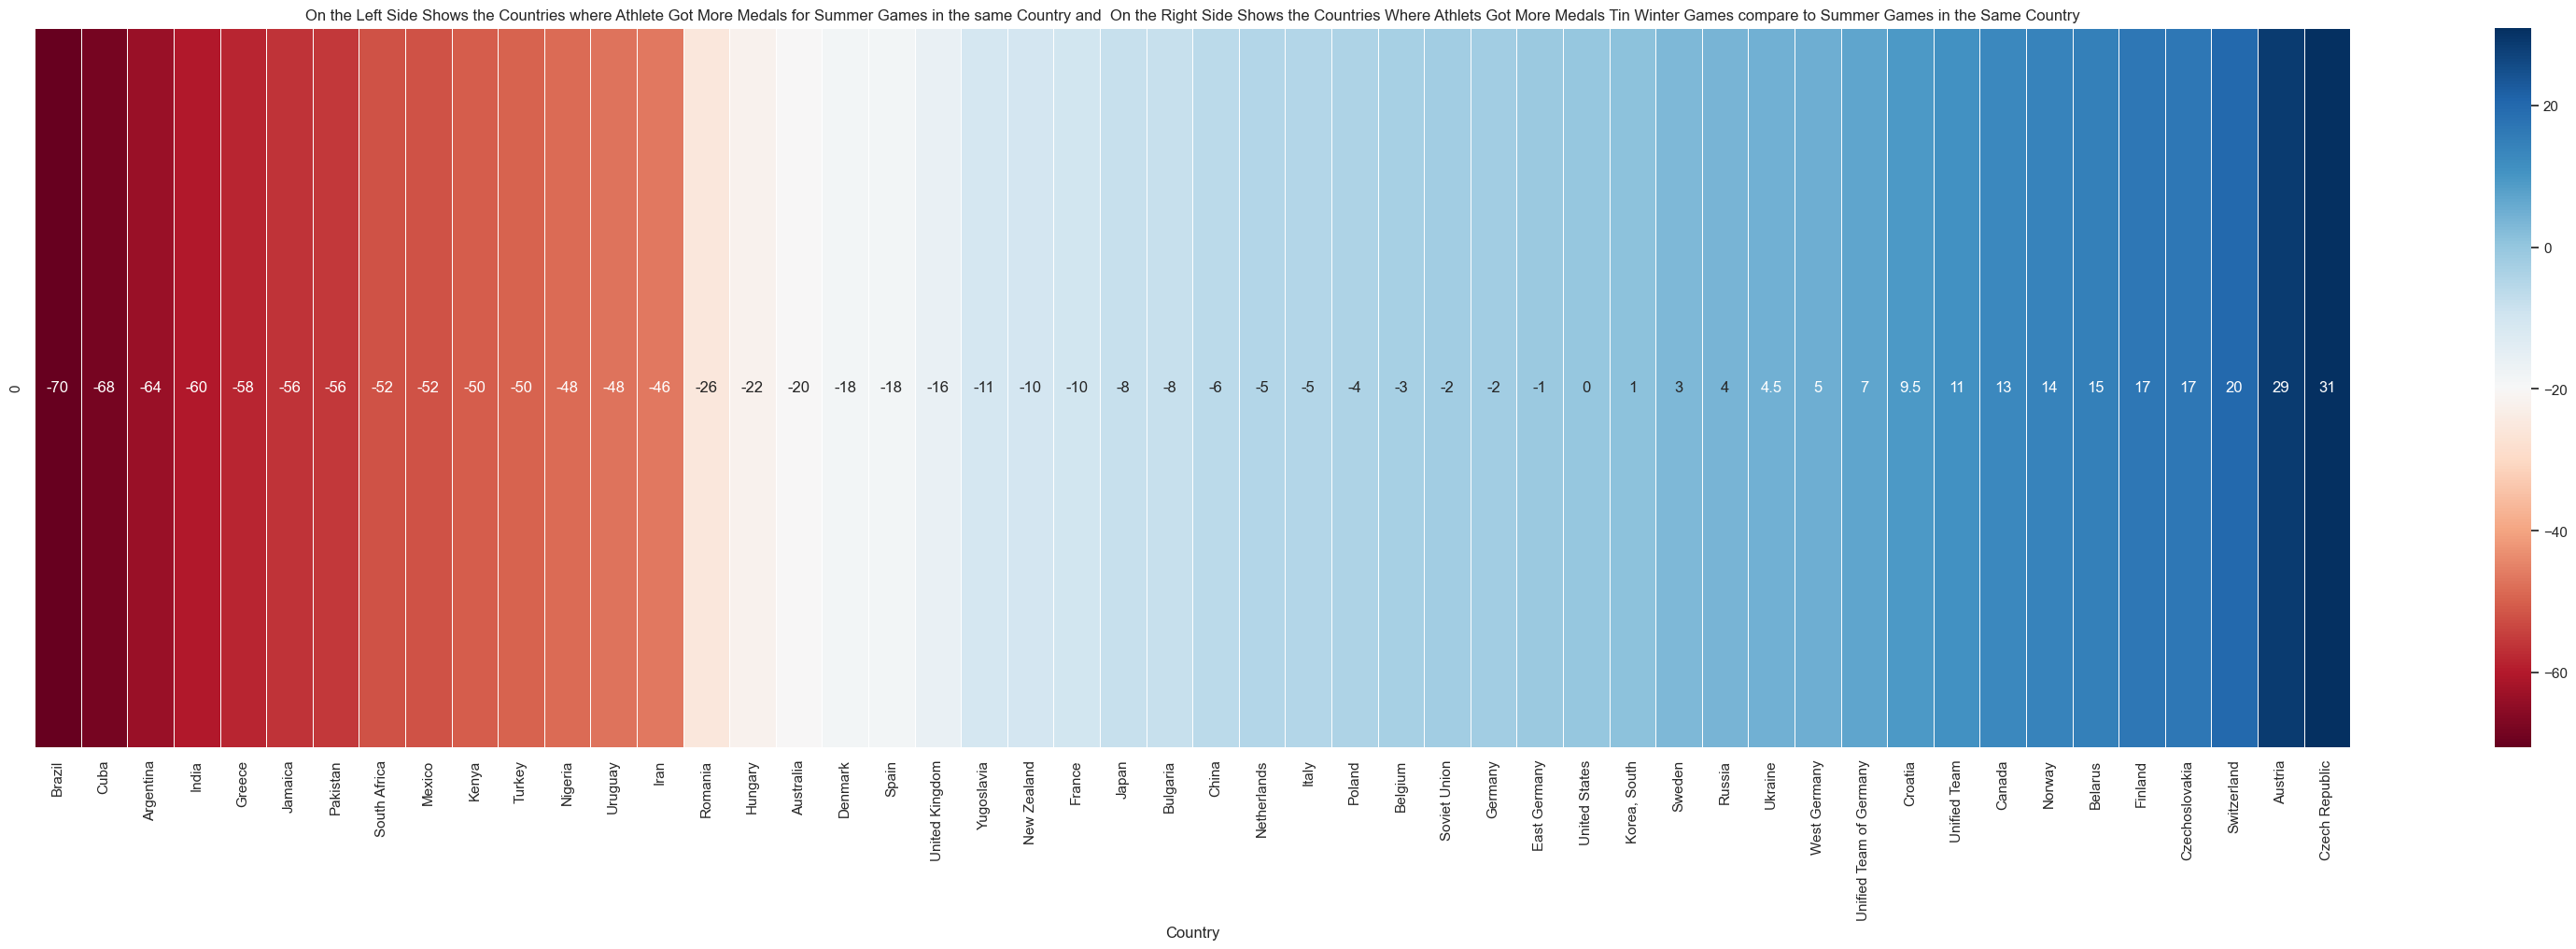

In [202]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(40, 10))
sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("RdBu_r", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(rank_diff.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('On the Left Side Shows the Countries where Athlete Got More Medals for Summer Games in the same Country and  On the Right Side Shows the Countries Where Athlets Got More Medals Tin Winter Games compare to Summer Games in the Same Country')
plt.xlabel('Country')
plt.show()

### Second, lets compare athletes in summer games in one country to athletes in summer games in another country. In which countries the athletes got most medals. The same do for the winter games.

In [205]:
top_50_sum = top_50_rank.sort_values("Summer")[["Summer"]]
top_50_sum

,Summer
Country,
United States,1.00
Soviet Union,2.00
United Kingdom,3.00
France,4.00
Germany,5.00
Italy,6.00
Australia,7.00
Hungary,8.00
Sweden,9.00


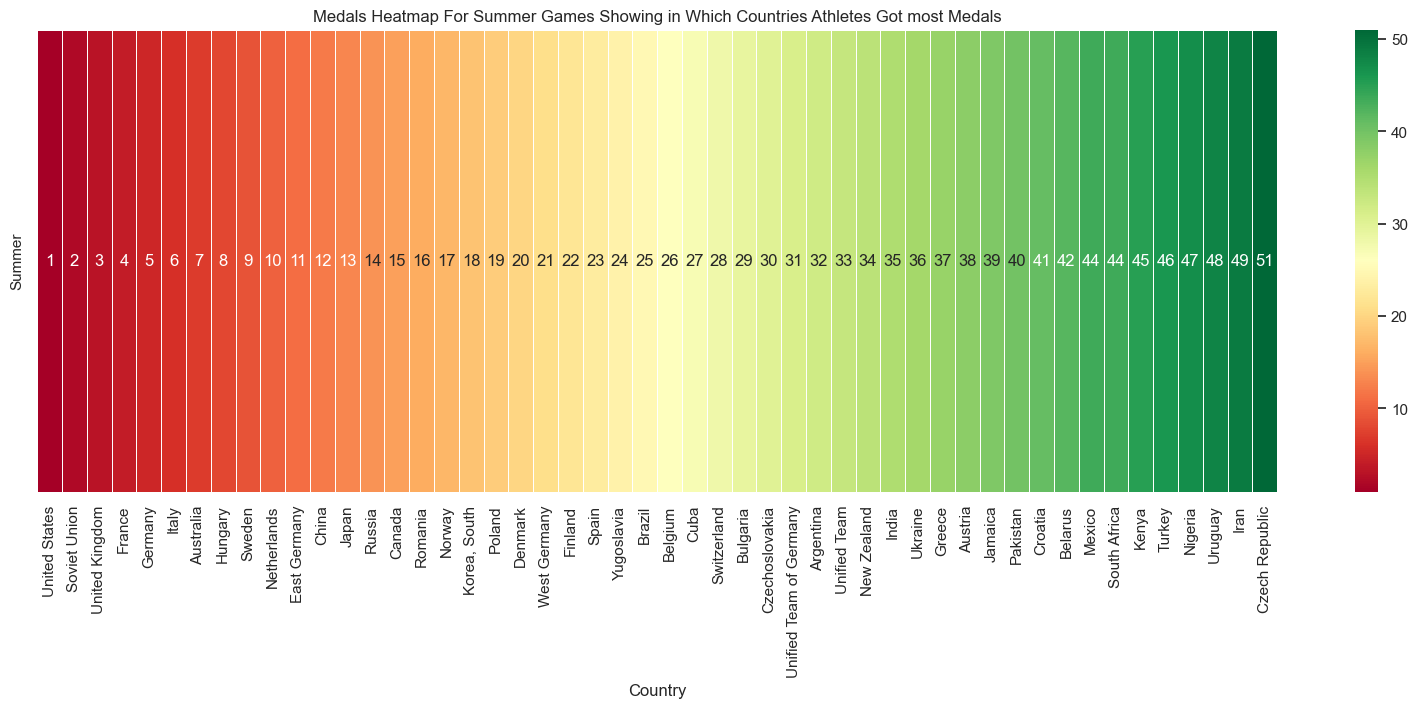

In [208]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette('RdYlGn_r', as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(top_50_sum.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('Medals Heatmap For Summer Games Showing in Which Countries Athletes Got most Medals')
plt.xlabel('Country')
plt.show()

In [209]:
top_50_win = top_50_rank.sort_values("Winter")[["Winter"]]
top_50_win

,Winter
Country,
United States,1.00
Canada,2.00
Norway,3.00
Soviet Union,4.00
Finland,5.00
Sweden,6.00
Germany,7.00
Switzerland,8.00
Austria,9.00


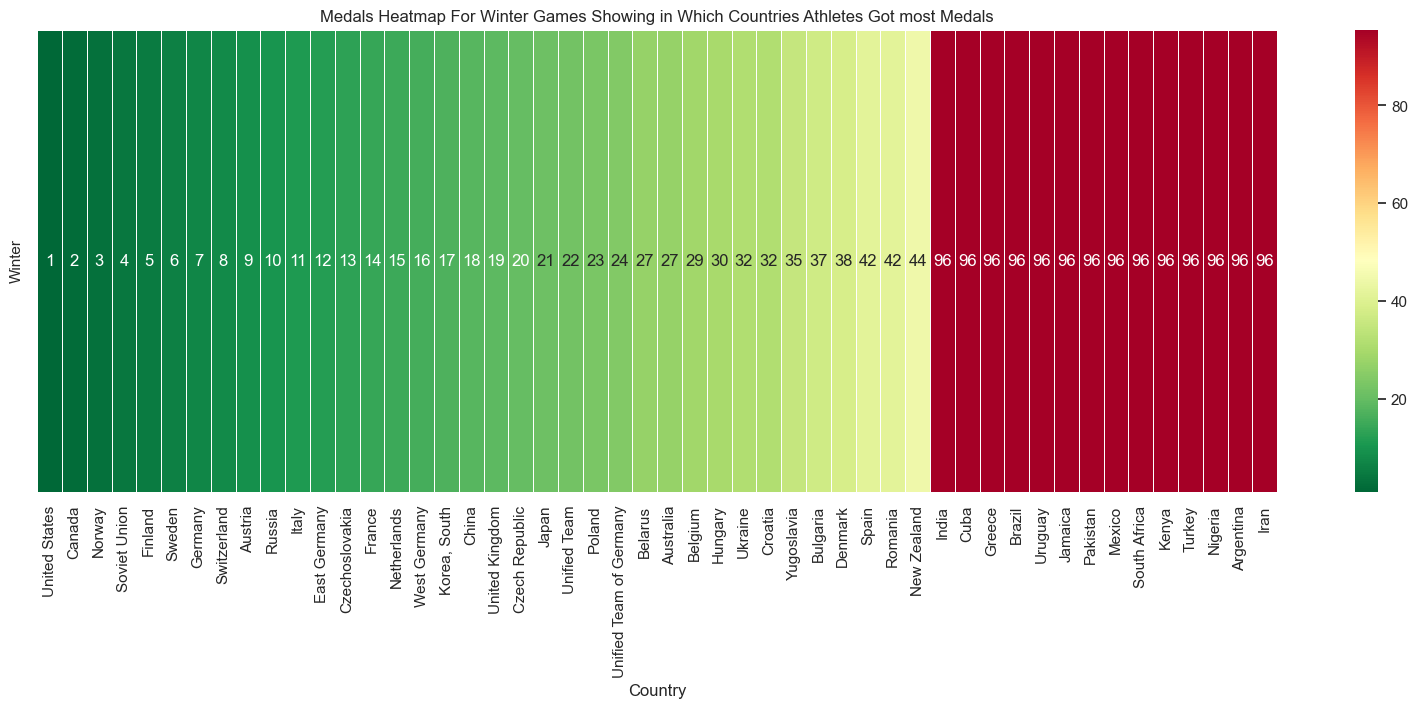

In [211]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette('RdYlGn_r', as_cmap=True)
# cmap = cmap.reversed()

heatmap = sns.heatmap(top_50_win.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('Medals Heatmap For Winter Games Showing in Which Countries Athletes Got most Medals')
plt.xlabel('Country')
plt.show()

## <font color='green' color face = "Giorgia">**Men vs. Women - does Culture & Religion matter?** </font> 

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful


What could be the reasons?

### First, compare men to women in the same country and who got more medals. Identify countries where the men got more medals compared to women and identify countries where the women got more medals compared to men in the same country.

In [212]:
equally_succesful_countries = top_50_rank[top_50_rank["Men"] == top_50_rank["Women"]][["Men", "Women"]]
equally_succesful_countries

,Men,Women
Country,,
United States,1.00,1.00
Soviet Union,2.00,2.00
Japan,13.00,13.00


The countries you mentioned - the United States, Soviet Union, and Japan - have achieved balanced performance in both men's and women's Olympics. 

In [213]:
men_more_successful_than_women_in_the_same_country = top_50_rank[top_50_rank["Men"] < top_50_rank["Women"]][["Men", "Women"]]
men_more_successful_than_women_in_the_same_country["diff"] = men_more_successful_than_women_in_the_same_country.Men - men_more_successful_than_women_in_the_same_country.Women

In [214]:
men_more_successful_than_women_in_the_same_country.sort_values("diff", inplace=True)

In [215]:
men_more_successful_than_women_in_the_same_country

,Men,Women,diff
Country,,,
Pakistan,37.00,120.00,-83.00
Uruguay,46.00,120.00,-74.00
Iran,48.00,120.00,-72.00
India,34.00,71.50,-37.50
Belgium,21.00,43.00,-22.00
Croatia,38.00,53.50,-15.50
Turkey,45.00,58.50,-13.50
Italy,5.00,18.00,-13.00
Switzerland,15.00,28.00,-13.00


In [216]:
len(men_more_successful_than_women_in_the_same_country)

26

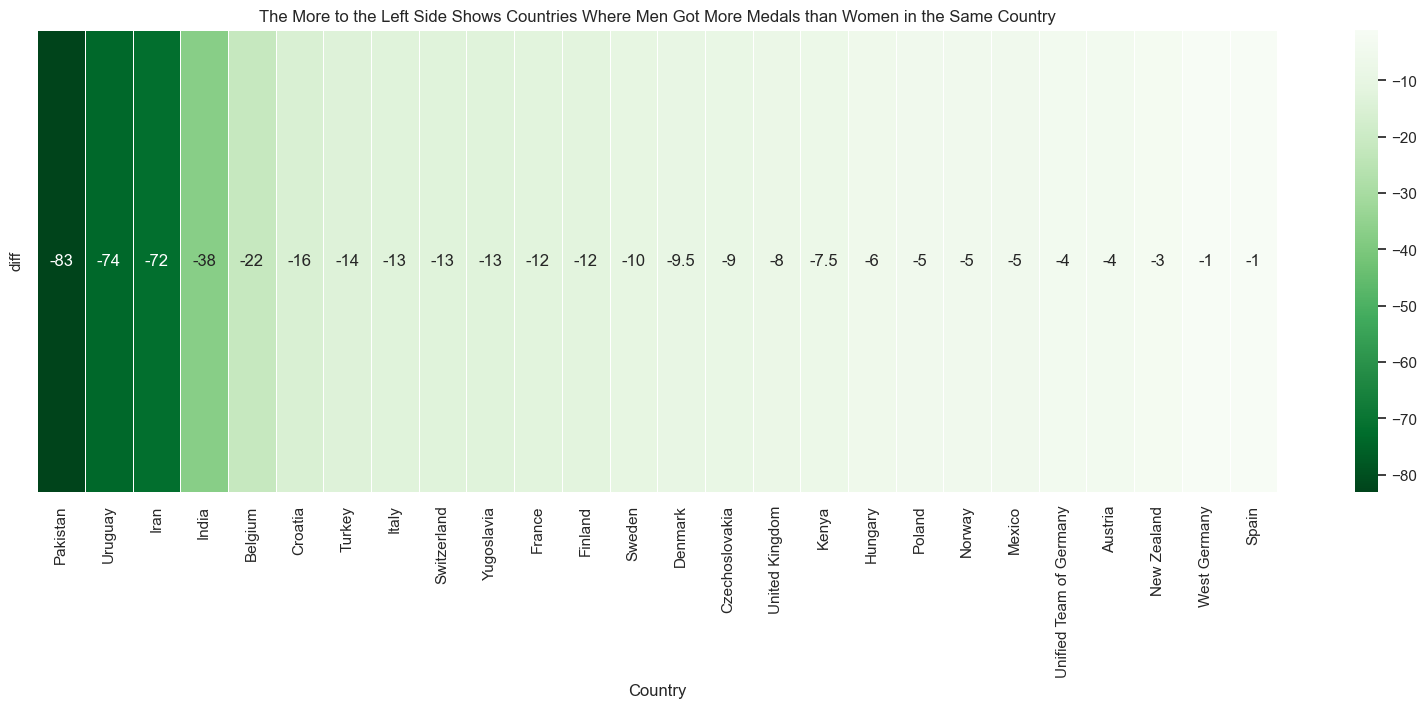

In [217]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("Greens", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(men_more_successful_than_women_in_the_same_country[["diff"]].T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('The More to the Left Side Shows Countries Where Men Got More Medals than Women in the Same Country')
plt.xlabel('Country')
plt.show()

In Pakistak, Uruguay, Iran, India etc... men got much more medals than women in the same country.

In [218]:
women_more_successful_than_men_in_the_same_country = top_50_rank[top_50_rank["Men"] > top_50_rank["Women"]][["Men", "Women"]]
women_more_successful_than_men_in_the_same_country['diff'] = women_more_successful_than_men_in_the_same_country.Women - women_more_successful_than_men_in_the_same_country.Men
women_more_successful_than_men_in_the_same_country.sort_values('diff', inplace=True)

In [219]:
women_more_successful_than_men_in_the_same_country

,Men,Women,diff
Country,,,
China,30.00,3.00,-27.00
Romania,28.00,10.00,-18.00
Jamaica,50.00,33.50,-16.50
Belarus,49.00,33.50,-15.50
Ukraine,42.00,27.00,-15.00
"Korea, South",25.50,12.00,-13.50
Unified Team,35.00,22.00,-13.00
Bulgaria,32.00,21.00,-11.00
Russia,16.00,6.00,-10.00


In [220]:
len(women_more_successful_than_men_in_the_same_country)

21

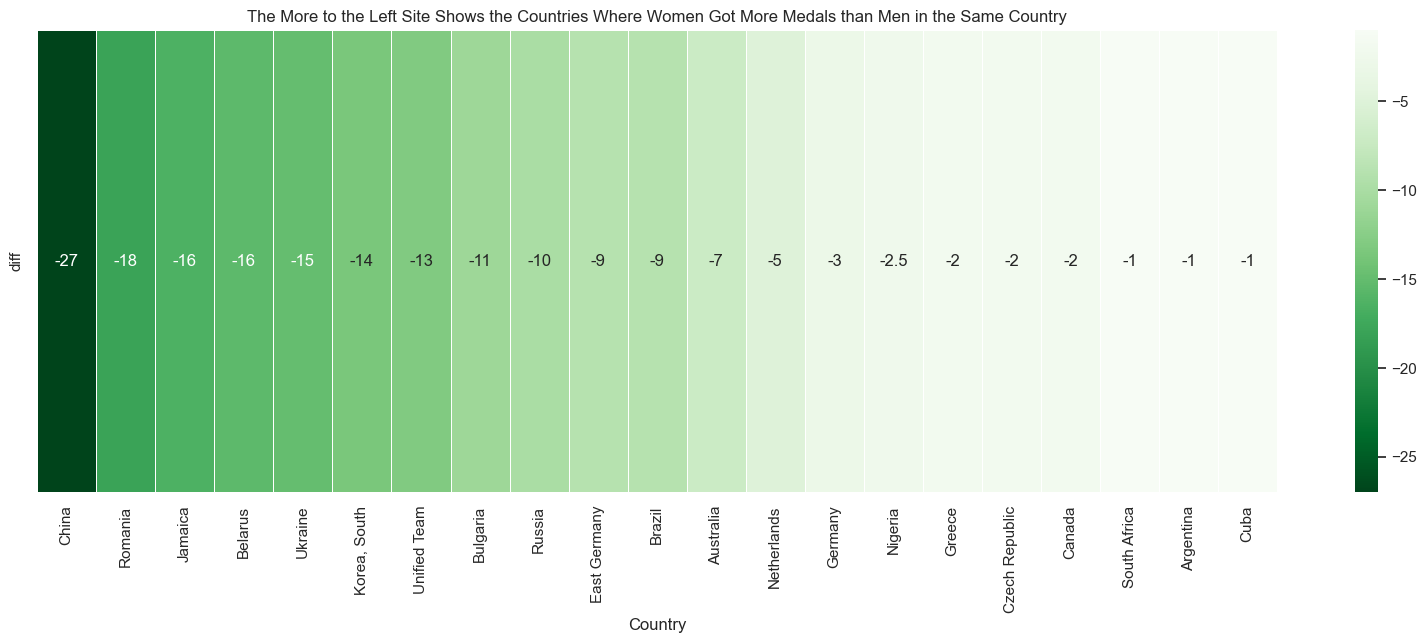

In [221]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("Greens", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(women_more_successful_than_men_in_the_same_country[["diff"]].T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('The More to the Left Site Shows the Countries Where Women Got More Medals than Men in the Same Country')
plt.xlabel('Country')
plt.show()

In China, Romania,  Jamaica, Belarus, Ukraine women got much more medals then men in the same country.

In [222]:
rank_diff2 = top_50_rank.Men.sub(top_50_rank.Women).sort_values().to_frame()
rank_diff2

,0
Country,
Pakistan,-83.00
Uruguay,-74.00
Iran,-72.00
India,-37.50
Belgium,-22.00
Croatia,-15.50
Turkey,-13.50
Yugoslavia,-13.00
Italy,-13.00


The smaller the number the more men won the medals comparing to women and the higher the number the more women won the medals comparing to the men.  

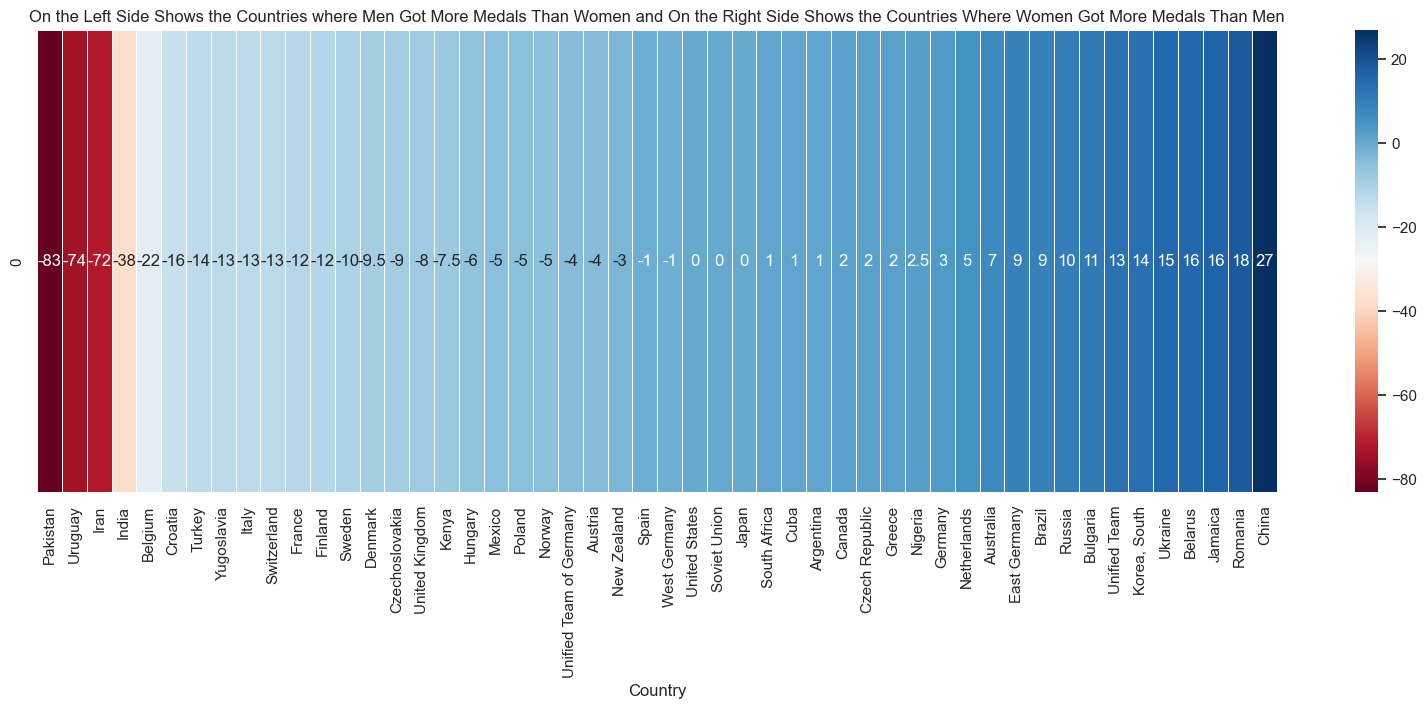

In [223]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("RdBu_r", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(rank_diff2.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('On the Left Side Shows the Countries where Men Got More Medals Than Women and On the Right Side Shows the Countries Where Women Got More Medals Than Men')
plt.xlabel('Country')
plt.show()

In [229]:
olympics.groupby(["Gender"])["Sport"].count()

Gender
Men      26688
Women    10243
Name: Sport, dtype: int64

In [230]:
len(olympics.loc[olympics["Gender"]=="Men", "Sport"].value_counts())

47

In [231]:
len(olympics.loc[olympics["Gender"]=="Women", "Sport"].value_counts())

36

- Historically, there are 26688 men sports compare to 10243 women sports events. 

- There are somewhat more man sports(47) than women sports(36).

### Second, we can compare the men in one country to the men in another country. In which countries the men got the most medals. In which countries the men got the least medals. Identify those countries. Then, we can compare the women in one country to the women in another country. In which countries the women got the most medals. In which countries the women got the least medals? Identify those countries. 

In [233]:
top_50_men = top_50_rank.sort_values("Men")[["Men"]]
top_50_men

,Men
Country,
United States,1.00
Soviet Union,2.00
United Kingdom,3.00
France,4.00
Italy,5.00
Sweden,6.00
Germany,7.00
Hungary,8.00
Canada,9.00


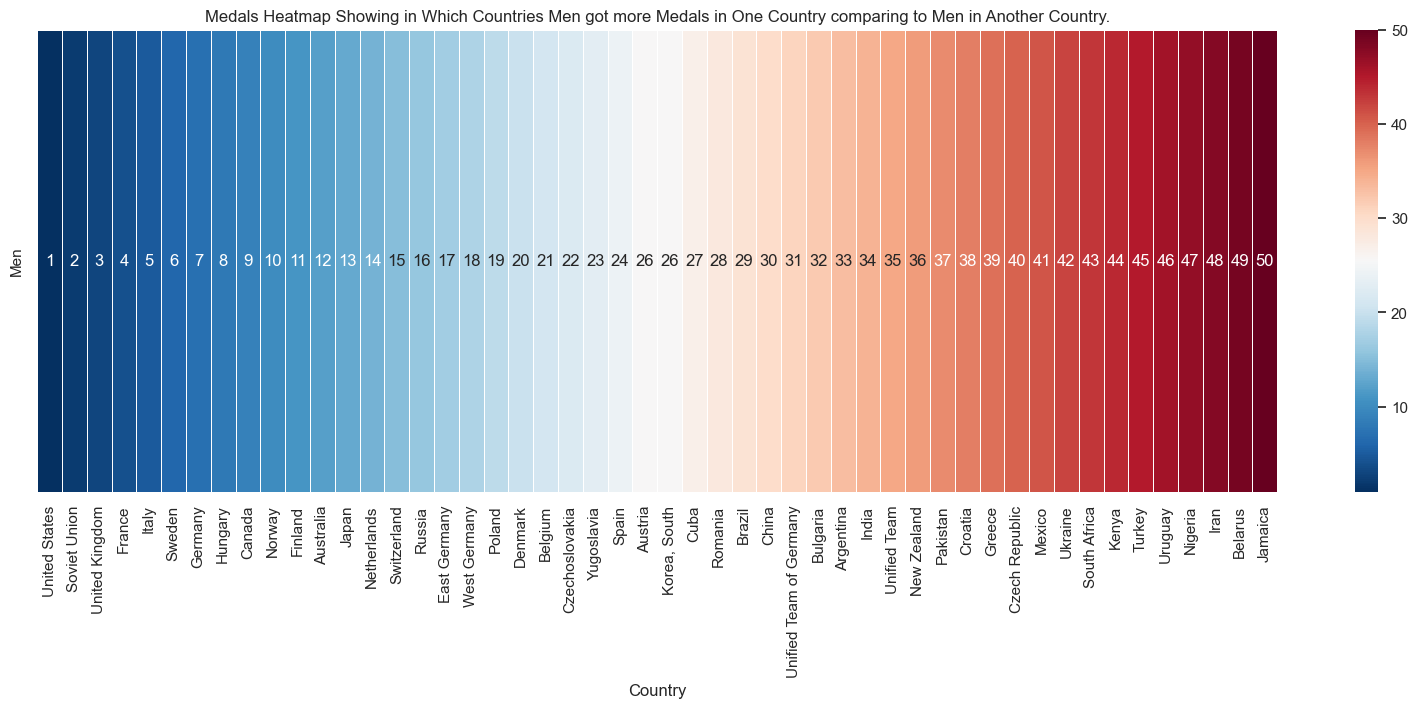

In [247]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap = cmap.reversed()

heatmap = sns.heatmap(top_50_men.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('Medals Heatmap Showing in Which Countries Men got more Medals in One Country comparing to Men in Another Country.')
plt.xlabel('Country')
plt.show()

In [236]:
top_50_women = top_50_rank.sort_values("Women")[["Women"]]
top_50_women

,Women
Country,
United States,1.00
Soviet Union,2.00
China,3.00
Germany,4.00
Australia,5.00
Russia,6.00
Canada,7.00
East Germany,8.00
Netherlands,9.00


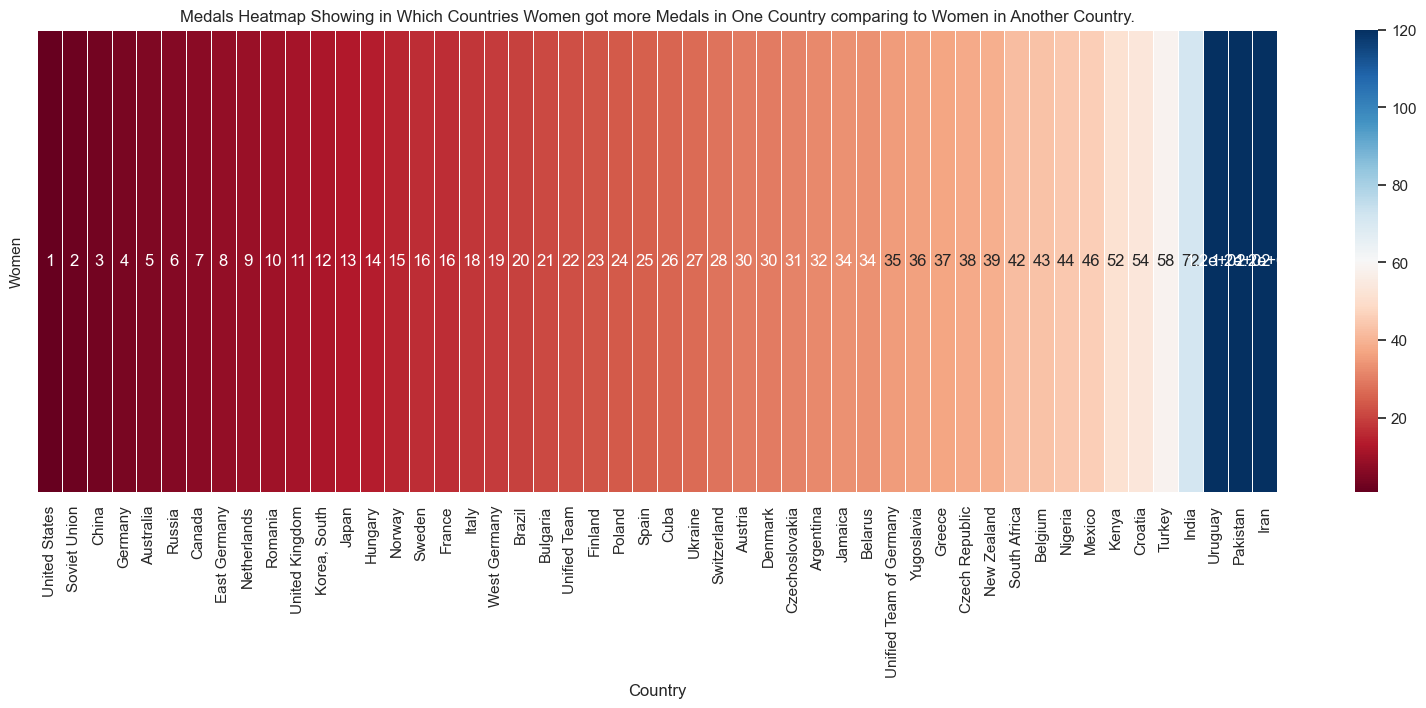

In [246]:
# Create a Seaborn heatmap for medal distribution by country
plt.figure(figsize=(20, 6))
# sns.set(font_scale=1)

# Invert the colormap from light to dark
cmap = sns.color_palette("RdBu", as_cmap=True)
# cmap = cmap.reversed()

heatmap = sns.heatmap(top_50_women.T, cmap=cmap, annot=True, linewidths=0.5)

plt.xticks(rotation=90)
plt.title('Medals Heatmap Showing in Which Countries Women got more Medals in One Country comparing to Women in Another Country.')
plt.xlabel('Country')
plt.show()

## <font color='green' color face = "Giorgia">**Do Traditions matter?** </font> 

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

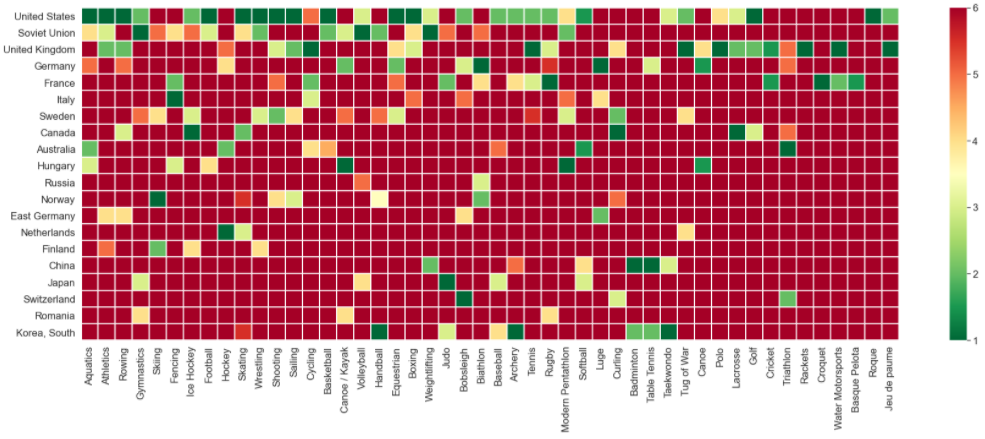

In [248]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [249]:
olympics.Sport.value_counts()

Sport
Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Luge                  180
Modern Pentathlon     180
Curling               172
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacros

In [250]:
sports = olympics.Sport.value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object', name='Sport')

In [251]:
olympics.Country.value_counts().head(20)

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Norway            1011
East Germany       987
Netherlands        973
Finland            890
China              889
Japan              851
Switzerland        665
Romania            642
Korea, South       616
Name: count, dtype: int64

In [252]:
top_20 = olympics.Country.value_counts().head(20).index
top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object', name='Country')

In [253]:
by_sport = pd.crosstab(olympics.Country, olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [254]:
by_sport = by_sport.rank(ascending = False, method = "average")
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.00,84.00,122.00,78.00,76.00,83.00,74.00,84.50,80.50,112.00,...,75.00,79.00,19.50,90.50,79.00,76.50,86.00,74.00,103.50,103.00
Algeria,101.00,84.00,47.00,78.00,76.00,83.00,74.00,84.50,80.50,35.00,...,75.00,79.00,89.50,90.50,79.00,76.50,86.00,74.00,103.50,103.00
Argentina,41.00,84.00,53.50,78.00,76.00,11.50,74.00,84.50,80.50,9.00,...,75.00,79.00,28.00,12.00,79.00,76.50,17.00,74.00,45.50,103.00
Armenia,101.00,84.00,122.00,78.00,76.00,83.00,74.00,84.50,80.50,70.50,...,75.00,79.00,89.50,90.50,79.00,76.50,86.00,74.00,35.50,40.00
Australasia,30.50,84.00,88.00,78.00,76.00,83.00,74.00,84.50,80.50,70.50,...,75.00,79.00,89.50,31.00,79.00,76.50,86.00,74.00,103.50,103.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,18.00,84.00,16.00,78.00,76.00,83.00,74.00,9.00,6.50,35.00,...,75.00,79.00,89.50,21.00,79.00,76.50,86.00,74.00,28.50,32.00
West Indies Federation,101.00,84.00,53.50,78.00,76.00,83.00,74.00,84.50,80.50,112.00,...,75.00,79.00,89.50,90.50,79.00,76.50,86.00,74.00,103.50,103.00
Yugoslavia,16.00,84.00,70.00,78.00,76.00,3.00,74.00,84.50,80.50,25.50,...,75.00,5.50,89.50,90.50,79.00,76.50,12.00,74.00,103.50,20.00


In [255]:
by_sport = by_sport.loc[top_20, sports].copy()
by_sport

Sport,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.00,1.00,1.00,2.00,8.00,7.00,2.00,1.00,12.00,1.00,...,3.00,1.00,9.50,74.00,73.50,73.50,74.00,74.00,1.00,2.00
Soviet Union,4.00,3.00,7.00,1.00,5.00,4.00,5.00,3.00,11.00,4.00,...,74.50,74.50,79.00,74.00,73.50,73.50,74.00,74.00,73.50,74.00
United Kingdom,10.50,2.00,2.00,19.00,34.50,15.00,10.00,20.00,5.00,16.00,...,2.00,2.00,5.00,1.50,1.00,73.50,1.00,74.00,73.50,1.00
Germany,5.00,7.00,5.00,16.00,6.00,6.00,13.00,7.50,4.00,9.00,...,74.50,74.50,5.00,74.00,73.50,73.50,74.00,74.00,73.50,74.00
France,14.00,8.00,11.00,17.00,10.00,2.00,79.50,23.00,83.00,17.00,...,74.50,74.50,79.00,1.50,73.50,1.00,2.00,1.50,73.50,74.00
Italy,12.00,14.00,8.00,8.50,9.00,1.00,79.50,7.50,83.00,11.50,...,74.50,74.50,79.00,74.00,73.50,73.50,74.00,74.00,73.50,74.00
Sweden,15.00,9.00,30.00,5.00,4.00,12.00,3.00,13.50,83.00,15.00,...,74.50,74.50,9.50,74.00,73.50,73.50,74.00,74.00,73.50,74.00
Canada,13.00,12.50,3.00,30.50,12.00,90.00,1.00,22.00,83.00,2.00,...,1.00,3.00,5.00,74.00,73.50,73.50,74.00,74.00,73.50,74.00
Australia,2.00,12.50,9.00,37.00,21.50,90.00,79.50,90.50,2.00,24.00,...,74.50,74.50,1.00,74.00,73.50,73.50,74.00,74.00,73.50,74.00


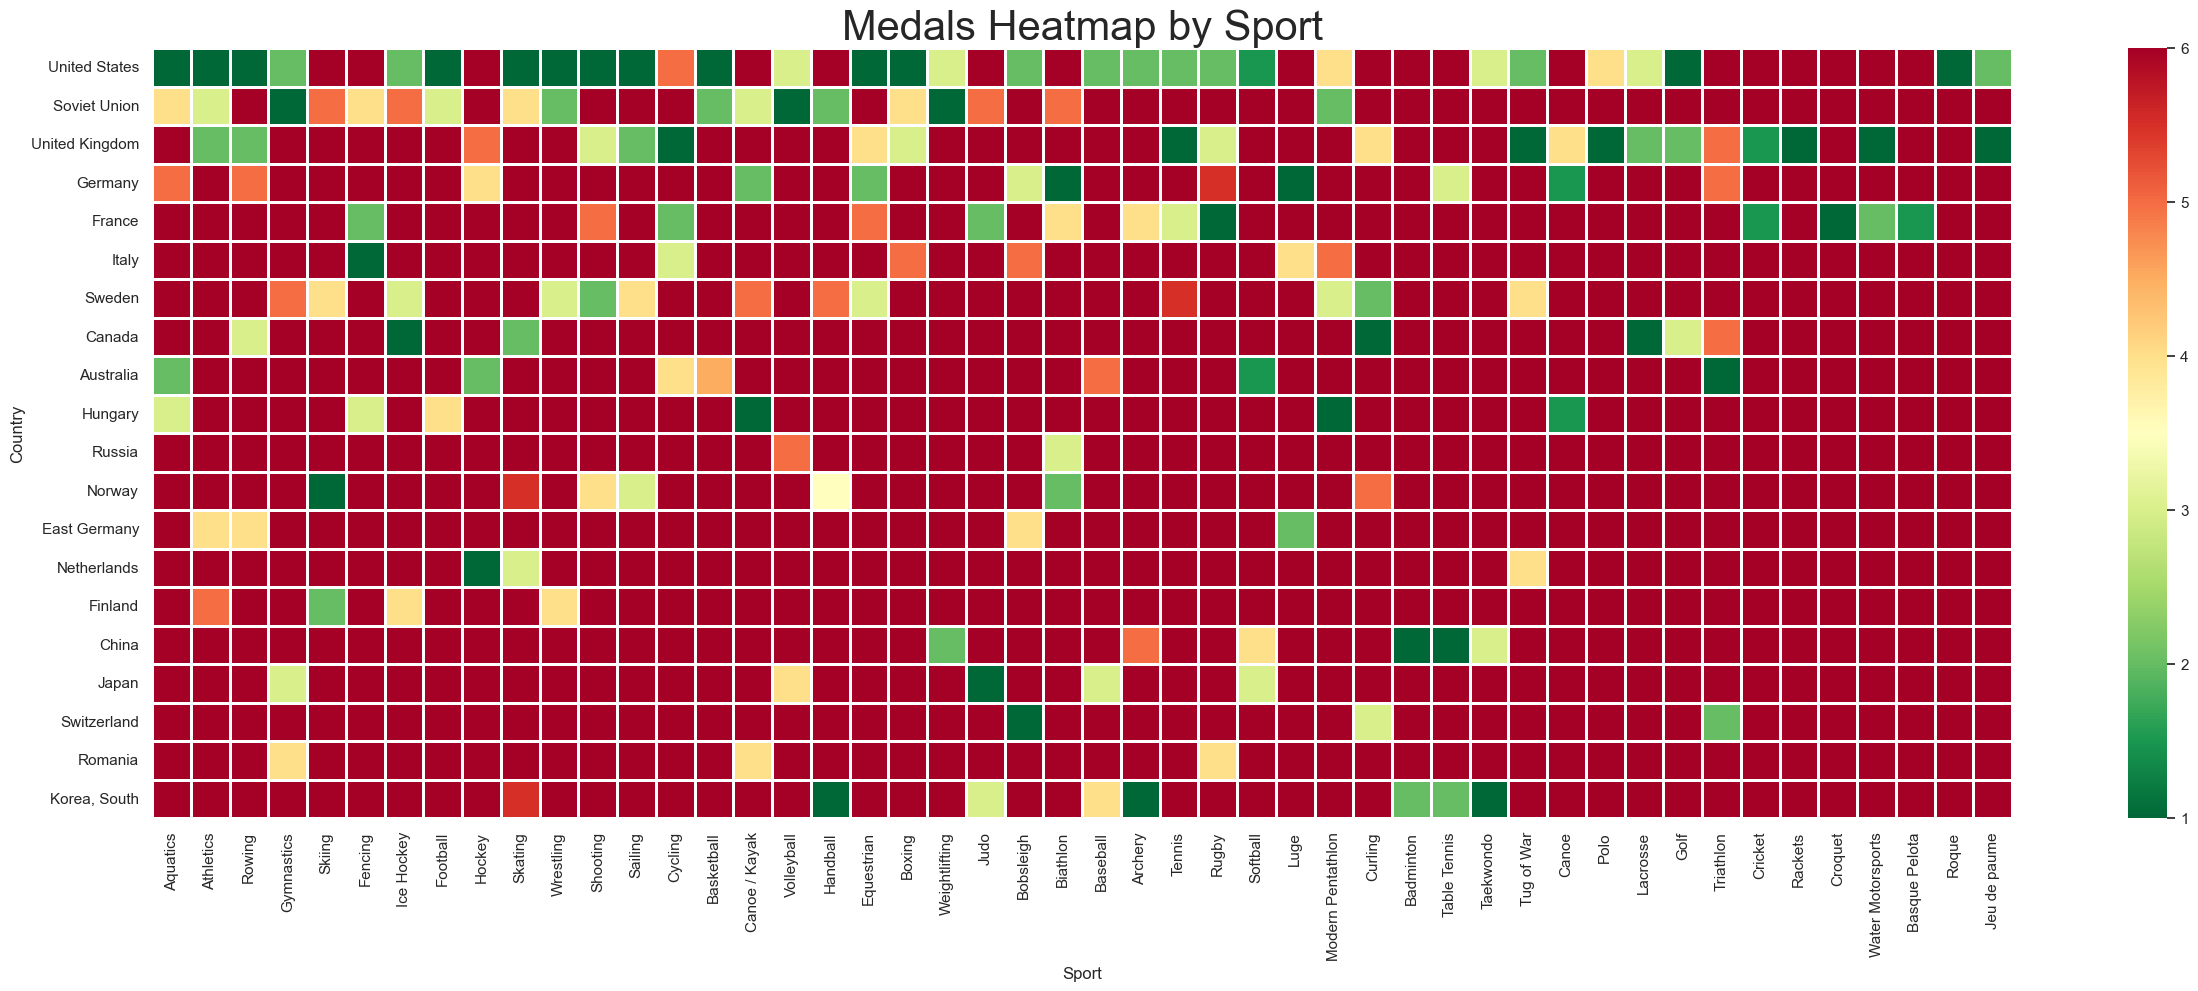

In [261]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport, cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.title('Medals Heatmap by Sport', fontsize=30)
plt.show()

Identify traditional Sports / National Sports for e.g. UK and China:

In [264]:
uk = by_sport.loc["United Kingdom"]
uk_top_sport = uk[uk==1]
uk_top_sport

Sport
Cycling             1.00
Tennis              1.00
Tug of War          1.00
Polo                1.00
Rackets             1.00
Water Motorsports   1.00
Jeu de paume        1.00
Name: United Kingdom, dtype: float64

In [265]:
china = by_sport.loc["China"]
china_top_sport = china[china==1]
china_top_sport

Sport
Badminton      1.00
Table Tennis   1.00
Name: China, dtype: float64

Traditional sport for the UK are cycling, tennis, tug of war, polo, Croquet, Water Motorsport, and Jeu de paume.  
Traditinal sport for China are Table Tennis and Badminton.